In [1]:
import sys

sys.path.append("../Handlers")

In [2]:
JSON_WRITE_MODE = "overwrite"

#### Evaluate different models

In [3]:
from traintest import ClassificationModel, get_classification_models, add_to_json_array
from functools import partial
from concurrent.futures import ThreadPoolExecutor

metric_results = []

def t_and_e(model, X, y, dataset_name):
    classification_model = ClassificationModel(model, dataset_name)
    classification_model.train_with_epochs(X, y, save_model=True, test_size=0.15, valid_size=0.15)
    print(f"{model.__class__.__name__} classification report")
    classification_model.plot_train_val_accuracy_after_epochs(xlabel="Epochs", ylabel="Accuracy", save_plot=True)
    metrics = classification_model.evaluate(detailed=True)
    metric_results.append(metrics)
    print(metrics)
    print("\n")

def train_and_evaluate_model(X, y, dataset_name, threading=True):
    m = get_classification_models()

    print(f"{dataset_name} classification report")
    print("=========================================")

    train_eval = partial(
        t_and_e,
        X=X,
        y=y,
        dataset_name=dataset_name
    )

    if threading:
        with ThreadPoolExecutor(max_workers=3) as executor:
            executor.map(train_eval, m)
    else:
        for mod in m:
            train_eval(mod)

    del m

## Lemmatizing + CountVectorizer

In [4]:
import joblib

enron1_lemmatized_countvec = joblib.load("./preprocess/enron1_lemmatized_countvec.pkl")
enron2_lemmatized_countvec = joblib.load("./preprocess/enron2_lemmatized_countvec.pkl")
enron3_lemmatized_countvec = joblib.load("./preprocess/enron3_lemmatized_countvec.pkl")
enron4_lemmatized_countvec = joblib.load("./preprocess/enron4_lemmatized_countvec.pkl")
enron5_lemmatized_countvec = joblib.load("./preprocess/enron5_lemmatized_countvec.pkl")
enron6_lemmatized_countvec = joblib.load("./preprocess/enron6_lemmatized_countvec.pkl")
enron_lemmatized_countvec = joblib.load("./preprocess/enron_lemmatized_countvec.pkl")

In [5]:
enron1_lemmatized_countvec_X, enron1_y = enron1_lemmatized_countvec["features"], enron1_lemmatized_countvec["labels"]
enron2_lemmatized_countvec_X, enron2_y = enron2_lemmatized_countvec["features"], enron2_lemmatized_countvec["labels"]
enron3_lemmatized_countvec_X, enron3_y = enron3_lemmatized_countvec["features"], enron3_lemmatized_countvec["labels"]
enron4_lemmatized_countvec_X, enron4_y = enron4_lemmatized_countvec["features"], enron4_lemmatized_countvec["labels"]
enron5_lemmatized_countvec_X, enron5_y = enron5_lemmatized_countvec["features"], enron5_lemmatized_countvec["labels"]
enron6_lemmatized_countvec_X, enron6_y = enron6_lemmatized_countvec["features"], enron6_lemmatized_countvec["labels"]
enron_lemmatized_countvec_X, enron_y = enron_lemmatized_countvec["features"], enron_lemmatized_countvec["labels"]
del enron1_lemmatized_countvec
del enron2_lemmatized_countvec
del enron3_lemmatized_countvec
del enron4_lemmatized_countvec
del enron5_lemmatized_countvec
del enron6_lemmatized_countvec
del enron_lemmatized_countvec

enron1_lemmatized_countvec classification report
MultinomialNB classification report
BernoulliNB classification report


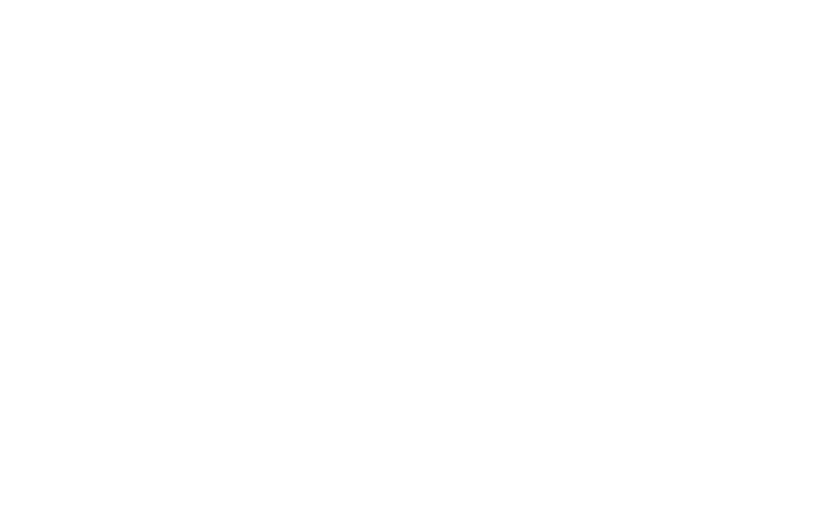

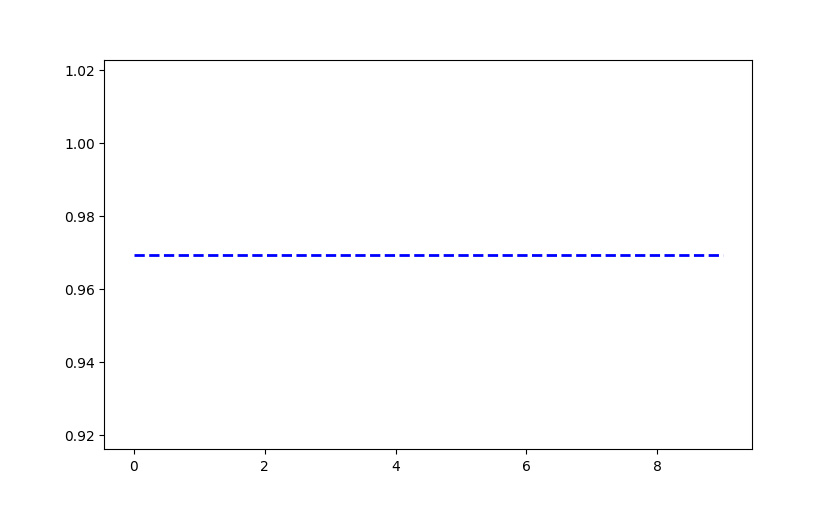

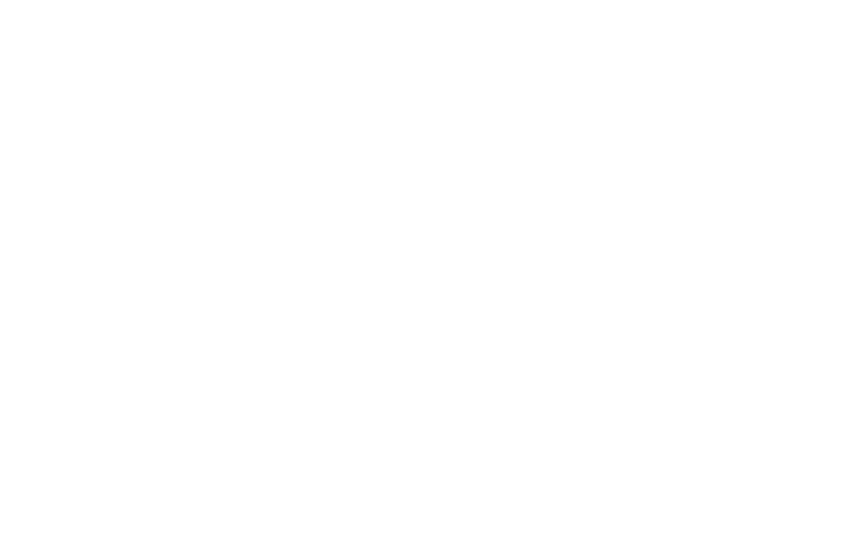

{'dataset': 'enron1_lemmatized_countvec', 'model': 'Bernoulli Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.904639175257732, 'weighted_precision': 0.9055979339484493, 'wighted_recall': 0.904639175257732, 'weighted_f1': 0.9013310320162958, 'macro_precision': 0.9091279091279091, 'macro_recall': 0.855832662912309, 'macro_f1': 0.8769710681475387, 'roc_auc': 0.8558326629123091}, 'confusion_matrix': array([[535,  15],
       [ 59, 167]], dtype=int64), 'epochs': 10}




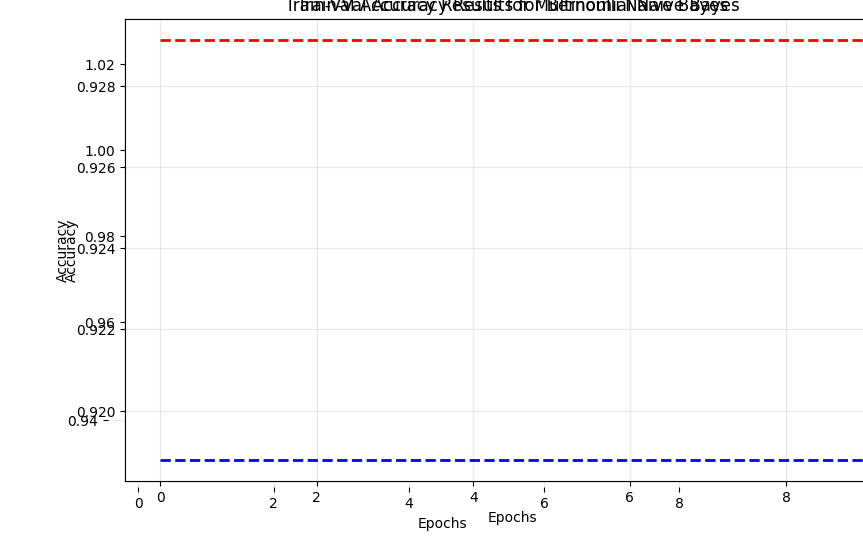

{'dataset': 'enron1_lemmatized_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.970360824742268, 'weighted_precision': 0.972040582669756, 'wighted_recall': 0.970360824742268, 'weighted_f1': 0.9706653701900787, 'macro_precision': 0.9560334777136945, 'macro_recall': 0.9751810136765888, 'macro_f1': 0.9648610922435704, 'roc_auc': 0.9751810136765889}, 'confusion_matrix': array([[530,  20],
       [  3, 223]], dtype=int64), 'epochs': 10}


DecisionTreeClassifier classification report


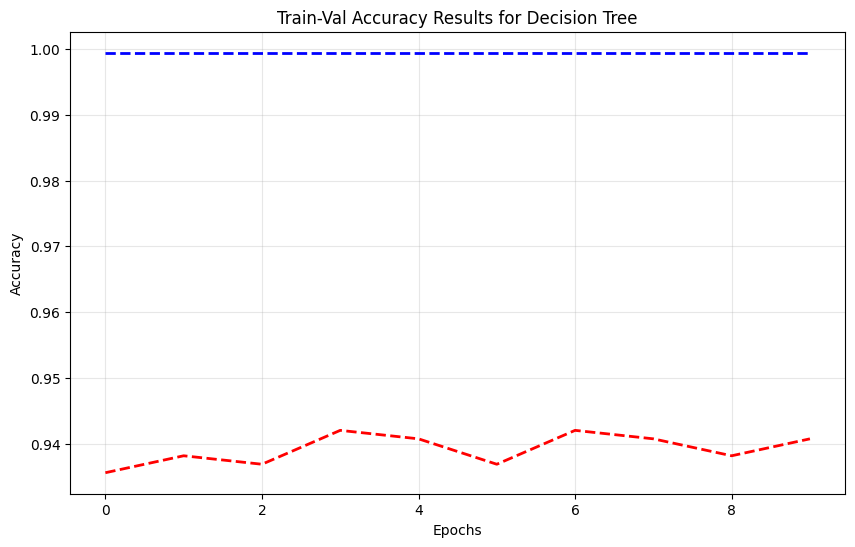

{'dataset': 'enron1_lemmatized_countvec', 'model': 'Decision Tree', 'type': 'normal', 'metrics': {'accuracy': 0.9188144329896907, 'weighted_precision': 0.9179764753476841, 'wighted_recall': 0.9188144329896907, 'weighted_f1': 0.9177224683722264, 'macro_precision': 0.9108317838737339, 'macro_recall': 0.8892920353982301, 'macro_f1': 0.8991015980533592, 'roc_auc': 0.88929203539823}, 'confusion_matrix': array([[528,  22],
       [ 41, 185]], dtype=int64), 'epochs': 10}


AdaBoostClassifier classification report


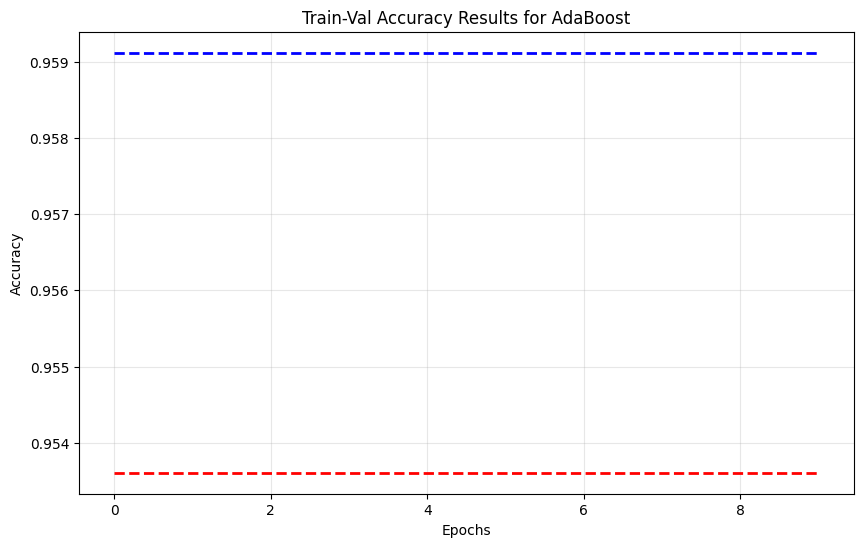

{'dataset': 'enron1_lemmatized_countvec', 'model': 'AdaBoost', 'type': 'normal', 'metrics': {'accuracy': 0.9587628865979382, 'weighted_precision': 0.9599048909411617, 'wighted_recall': 0.9587628865979382, 'weighted_f1': 0.95906871458146, 'macro_precision': 0.9444878323076442, 'macro_recall': 0.9578761061946903, 'macro_f1': 0.9508113590263692, 'roc_auc': 0.9578761061946903}, 'confusion_matrix': array([[528,  22],
       [ 10, 216]], dtype=int64), 'epochs': 10}


SVC classification report


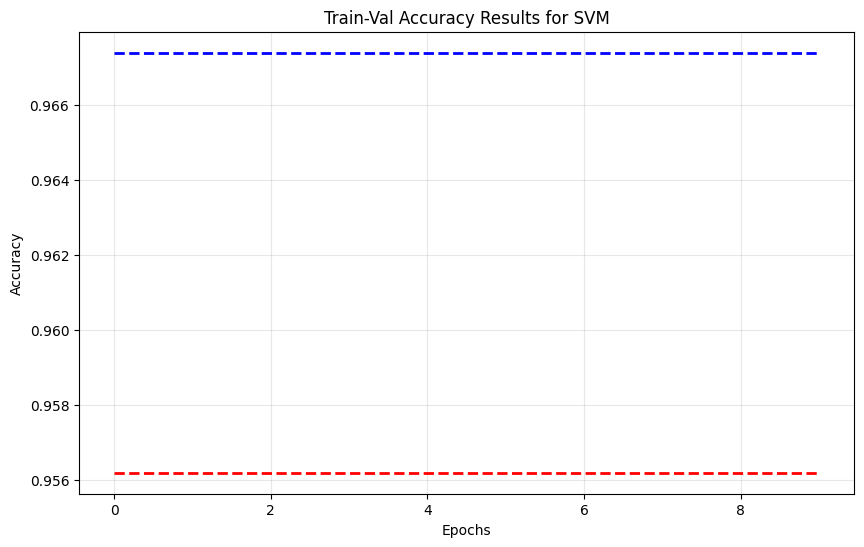

{'dataset': 'enron1_lemmatized_countvec', 'model': 'SVM', 'type': 'normal', 'metrics': {'accuracy': 0.9484536082474226, 'weighted_precision': 0.9500456801046315, 'wighted_recall': 0.9484536082474226, 'weighted_f1': 0.9488956591255637, 'macro_precision': 0.9316231343283582, 'macro_recall': 0.9466934835076428, 'macro_f1': 0.9386653388028676, 'roc_auc': 0.9466934835076428}, 'confusion_matrix': array([[523,  27],
       [ 13, 213]], dtype=int64), 'epochs': 10}


LogisticRegression classification report


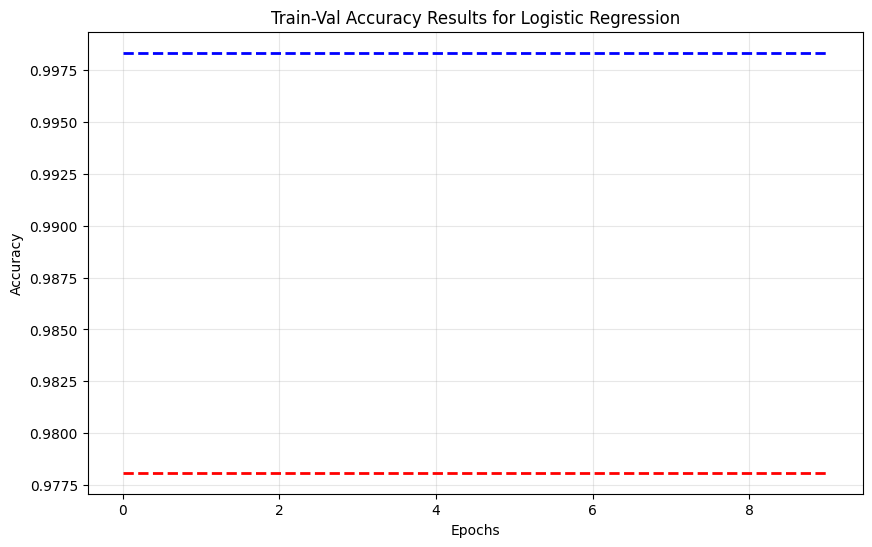

{'dataset': 'enron1_lemmatized_countvec', 'model': 'Logistic Regression', 'type': 'normal', 'metrics': {'accuracy': 0.9780927835051546, 'weighted_precision': 0.9784743019324021, 'wighted_recall': 0.9780927835051546, 'weighted_f1': 0.9781896808004843, 'macro_precision': 0.9696448754732491, 'macro_recall': 0.9780289621882542, 'macro_f1': 0.9737047202737962, 'roc_auc': 0.9780289621882542}, 'confusion_matrix': array([[538,  12],
       [  5, 221]], dtype=int64), 'epochs': 10}


SGDClassifier classification report
RandomForestClassifier classification report


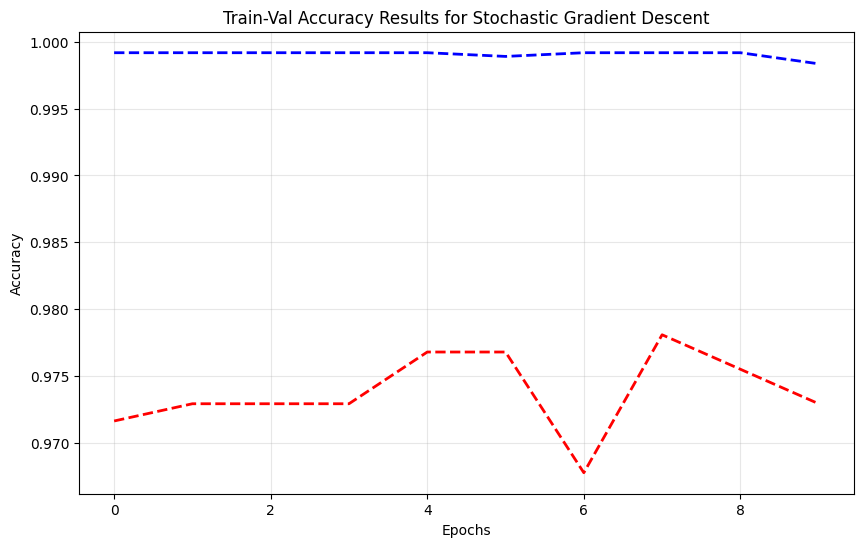

{'dataset': 'enron1_lemmatized_countvec', 'model': 'Stochastic Gradient Descent', 'type': 'normal', 'metrics': {'accuracy': 0.9690721649484536, 'weighted_precision': 0.9689644535543075, 'wighted_recall': 0.9690721649484536, 'weighted_f1': 0.9689480212370182, 'macro_precision': 0.966056245912361, 'macro_recall': 0.9586323411102172, 'macro_f1': 0.9622442608195007, 'roc_auc': 0.9586323411102172}, 'confusion_matrix': array([[541,   9],
       [ 15, 211]], dtype=int64), 'epochs': 10}


{'dataset': 'enron1_lemmatized_countvec', 'model': 'Random Forest', 'type': 'normal', 'metrics': {'accuracy': 0.9716494845360825, 'weighted_precision': 0.9716494845360825, 'wighted_recall': 0.9716494845360825, 'weighted_f1': 0.9716494845360825, 'macro_precision': 0.9656637168141593, 'macro_recall': 0.9656637168141593, 'macro_f1': 0.9656637168141593, 'roc_auc': 0.9656637168141593}, 'confusion_matrix': array([[539,  11],
       [ 11, 215]], dtype=int64), 'epochs': 10}


Perceptron classification report
PassiveA

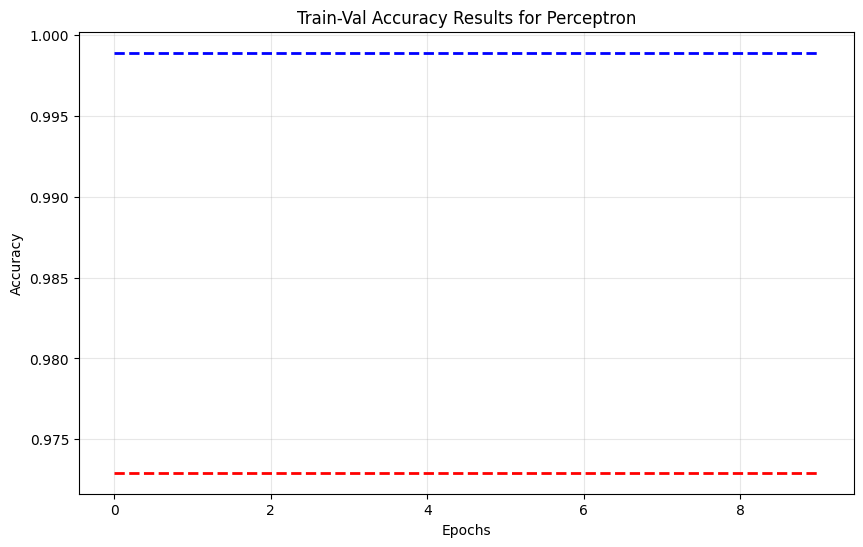

{'dataset': 'enron1_lemmatized_countvec', 'model': 'Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9639175257731959, 'weighted_precision': 0.9638178080510554, 'wighted_recall': 0.9639175257731959, 'weighted_f1': 0.9636718866555131, 'macro_precision': 0.962202380952381, 'macro_recall': 0.9497827835880933, 'macro_f1': 0.955713179242591, 'roc_auc': 0.9497827835880933}, 'confusion_matrix': array([[541,   9],
       [ 19, 207]], dtype=int64), 'epochs': 10}


{'dataset': 'enron1_lemmatized_countvec', 'model': 'Passive-Aggressive', 'type': 'normal', 'metrics': {'accuracy': 0.9600515463917526, 'weighted_precision': 0.9598785855408002, 'wighted_recall': 0.9600515463917526, 'weighted_f1': 0.9598078486845796, 'macro_precision': 0.9567652902236548, 'macro_recall': 0.9457522123893805, 'macro_f1': 0.9510347312263503, 'roc_auc': 0.9457522123893805}, 'confusion_matrix': array([[539,  11],
       [ 20, 206]], dtype=int64), 'epochs': 10}


KNeighborsClassifier classification report


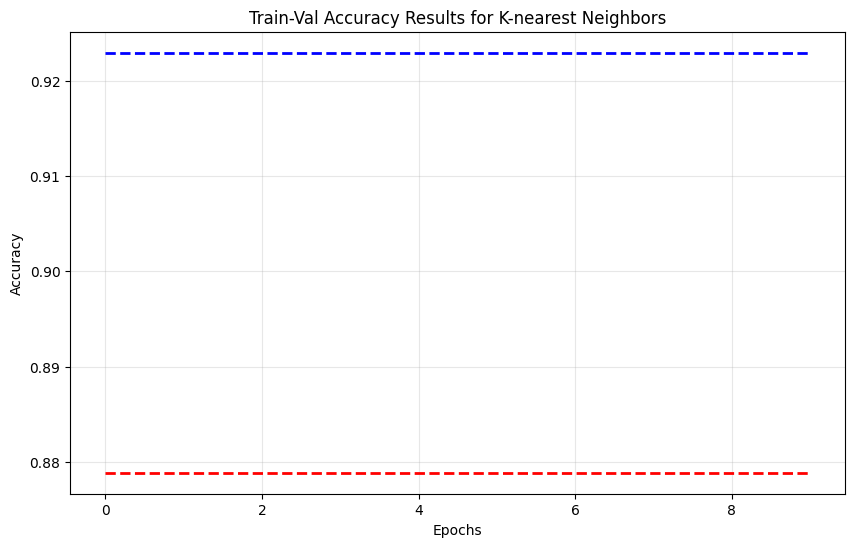

{'dataset': 'enron1_lemmatized_countvec', 'model': 'K-nearest Neighbors', 'type': 'normal', 'metrics': {'accuracy': 0.8737113402061856, 'weighted_precision': 0.8855960622208942, 'wighted_recall': 0.8737113402061856, 'weighted_f1': 0.8766818395964971, 'macro_precision': 0.8418386766212853, 'macro_recall': 0.8757200321802092, 'macro_f1': 0.8548081622678396, 'roc_auc': 0.8757200321802091}, 'confusion_matrix': array([[479,  71],
       [ 27, 199]], dtype=int64), 'epochs': 10}


MLPClassifier classification report


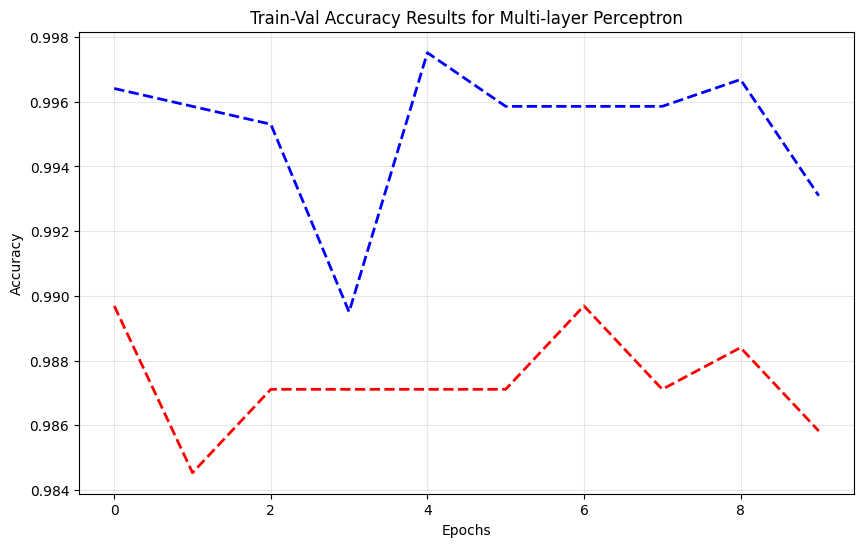

{'dataset': 'enron1_lemmatized_countvec', 'model': 'Multi-layer Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9819587628865979, 'weighted_precision': 0.9821132625032221, 'wighted_recall': 0.9819587628865979, 'weighted_f1': 0.982004969154016, 'macro_precision': 0.9758560280299411, 'macro_recall': 0.980756234915527, 'macro_f1': 0.9782622614931489, 'roc_auc': 0.9807562349155269}, 'confusion_matrix': array([[541,   9],
       [  5, 221]], dtype=int64), 'epochs': 10}




In [6]:
train_and_evaluate_model(enron1_lemmatized_countvec_X, enron1_y, "enron1_lemmatized_countvec")
del enron1_lemmatized_countvec_X, enron1_y

enron2_lemmatized_countvec classification report


MultinomialNB classification report


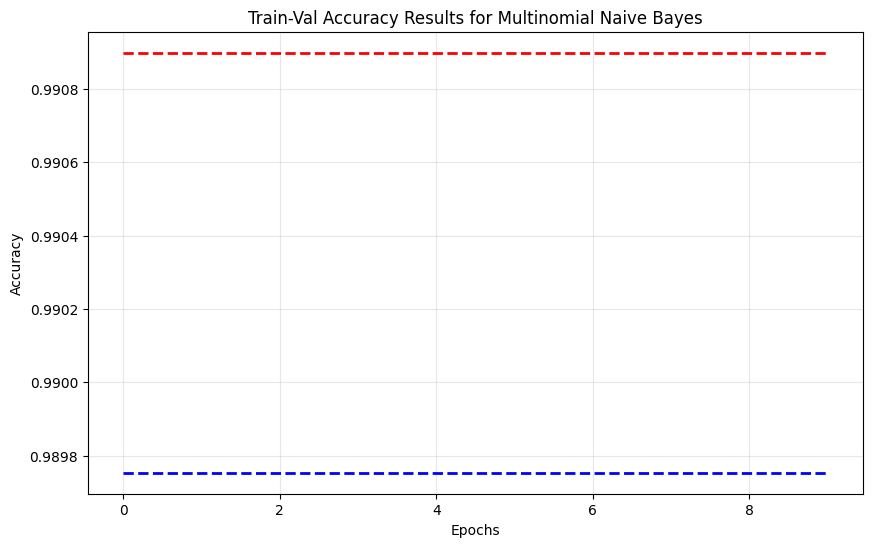

{'dataset': 'enron2_lemmatized_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9886234357224118, 'weighted_precision': 0.9886699046605092, 'wighted_recall': 0.9886234357224118, 'weighted_f1': 0.9886400192972508, 'macro_precision': 0.9836628765805201, 'macro_recall': 0.9864912758996729, 'macro_f1': 0.9850662589194699, 'roc_auc': 0.9864912758996729}, 'confusion_matrix': array([[649,   6],
       [  4, 220]], dtype=int64), 'epochs': 10}


BernoulliNB classification report


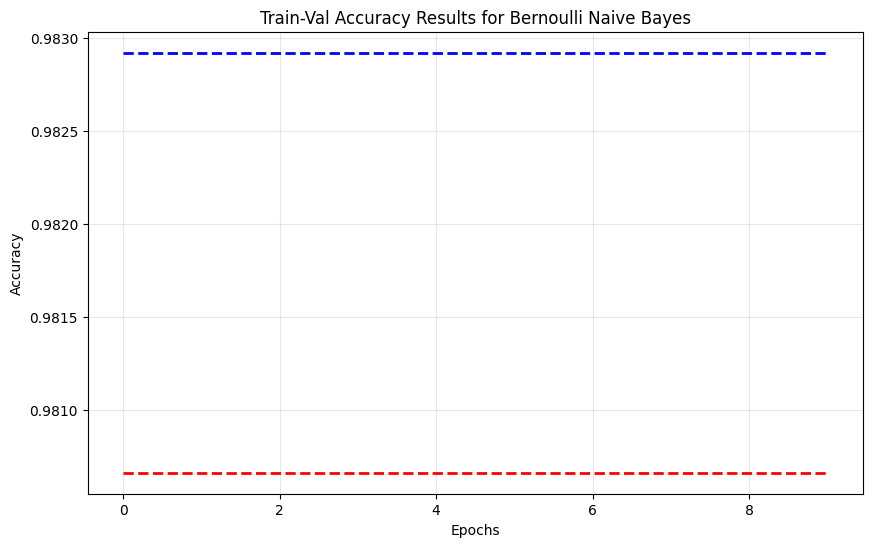

{'dataset': 'enron2_lemmatized_countvec', 'model': 'Bernoulli Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9852104664391353, 'weighted_precision': 0.9856621489496847, 'wighted_recall': 0.9852104664391353, 'weighted_f1': 0.9853049412303903, 'macro_precision': 0.9748468621693087, 'macro_recall': 0.9871387677208288, 'macro_f1': 0.9807806484491814, 'roc_auc': 0.9871387677208289}, 'confusion_matrix': array([[644,  11],
       [  2, 222]], dtype=int64), 'epochs': 10}


DecisionTreeClassifier classification report


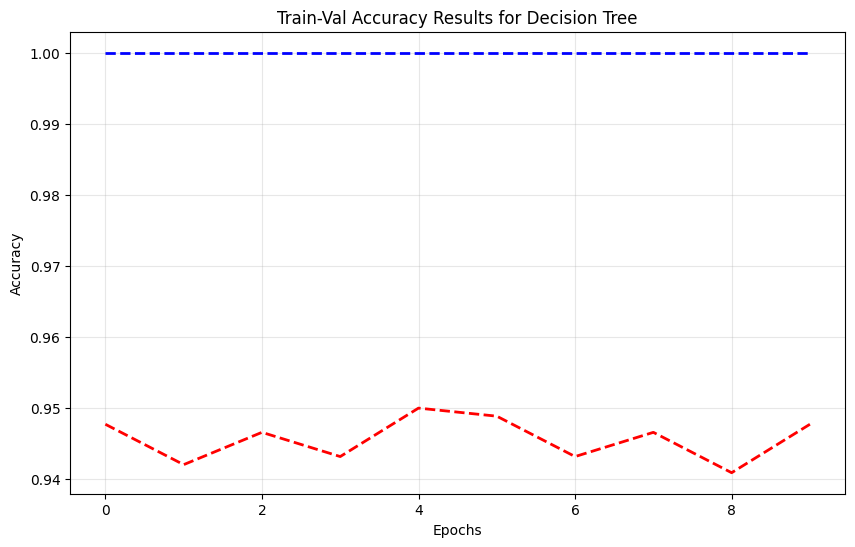

{'dataset': 'enron2_lemmatized_countvec', 'model': 'Decision Tree', 'type': 'normal', 'metrics': {'accuracy': 0.9613196814562003, 'weighted_precision': 0.9624166141201165, 'wighted_recall': 0.9613196814562003, 'weighted_f1': 0.9616454077267806, 'macro_precision': 0.9427175316972876, 'macro_recall': 0.9578891766630315, 'macro_f1': 0.9499464058417632, 'roc_auc': 0.9578891766630316}, 'confusion_matrix': array([[632,  23],
       [ 11, 213]], dtype=int64), 'epochs': 10}


AdaBoostClassifier classification report


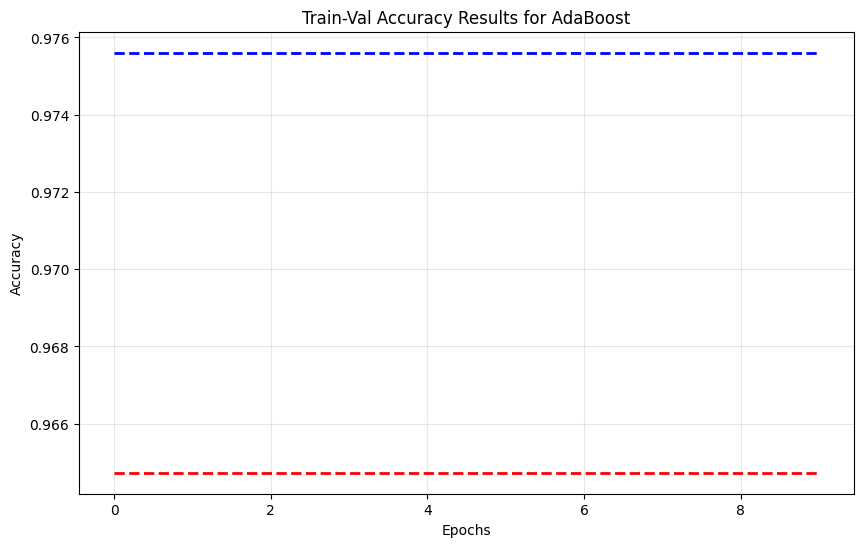

{'dataset': 'enron2_lemmatized_countvec', 'model': 'AdaBoost', 'type': 'normal', 'metrics': {'accuracy': 0.962457337883959, 'weighted_precision': 0.96393098822597, 'wighted_recall': 0.962457337883959, 'weighted_f1': 0.9628480518137674, 'macro_precision': 0.9427595449790795, 'macro_recall': 0.9615901035986913, 'macro_f1': 0.9516215382306095, 'roc_auc': 0.9615901035986915}, 'confusion_matrix': array([[631,  24],
       [  9, 215]], dtype=int64), 'epochs': 10}


RandomForestClassifier classification report


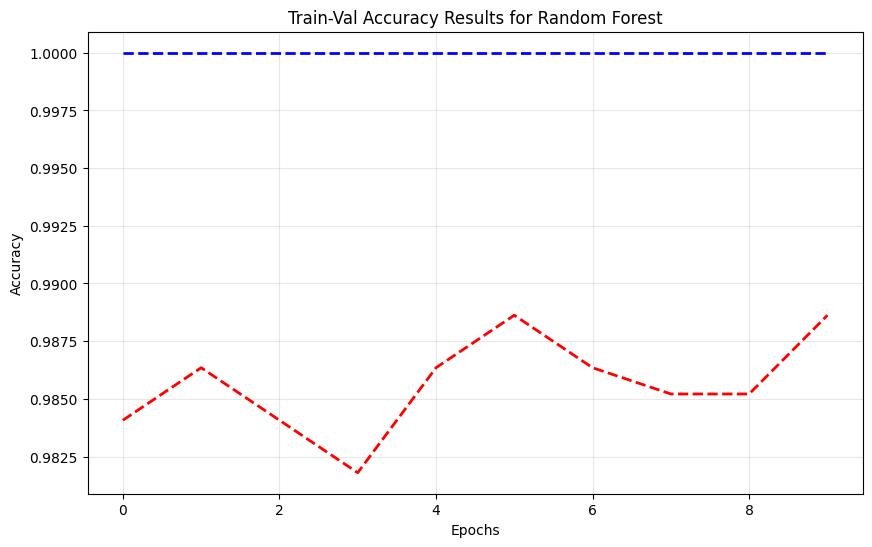

{'dataset': 'enron2_lemmatized_countvec', 'model': 'Random Forest', 'type': 'normal', 'metrics': {'accuracy': 0.9852104664391353, 'weighted_precision': 0.9851841383586672, 'wighted_recall': 0.9852104664391353, 'weighted_f1': 0.9851551210440795, 'macro_precision': 0.984049398090494, 'macro_recall': 0.9768572791712105, 'macro_f1': 0.980384347990284, 'roc_auc': 0.9768572791712105}, 'confusion_matrix': array([[651,   4],
       [  9, 215]], dtype=int64), 'epochs': 10}


KNeighborsClassifier classification report


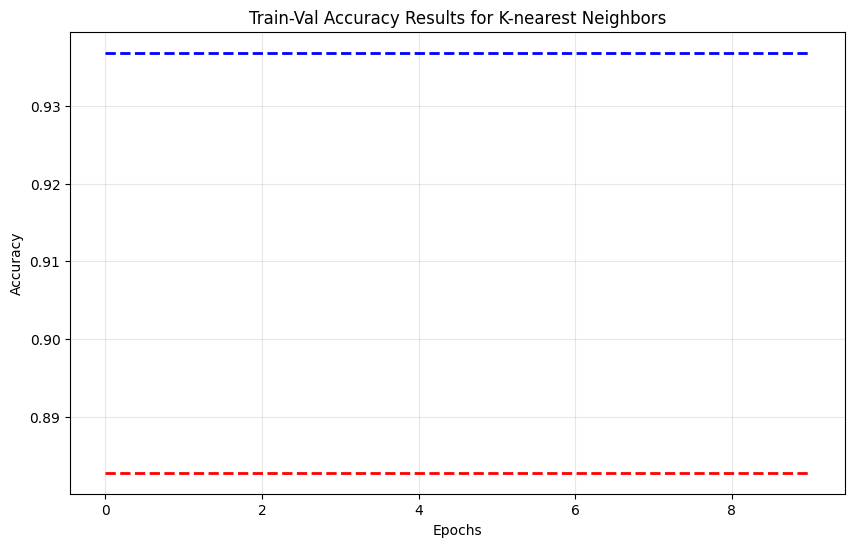

{'dataset': 'enron2_lemmatized_countvec', 'model': 'K-nearest Neighbors', 'type': 'normal', 'metrics': {'accuracy': 0.8862343572241184, 'weighted_precision': 0.9080659054900795, 'wighted_recall': 0.8862343572241184, 'weighted_f1': 0.8908022308640944, 'macro_precision': 0.8427228686662649, 'macro_recall': 0.903101145038168, 'macro_f1': 0.8634584317136822, 'roc_auc': 0.903101145038168}, 'confusion_matrix': array([[569,  86],
       [ 14, 210]], dtype=int64), 'epochs': 10}


SGDClassifier classification report


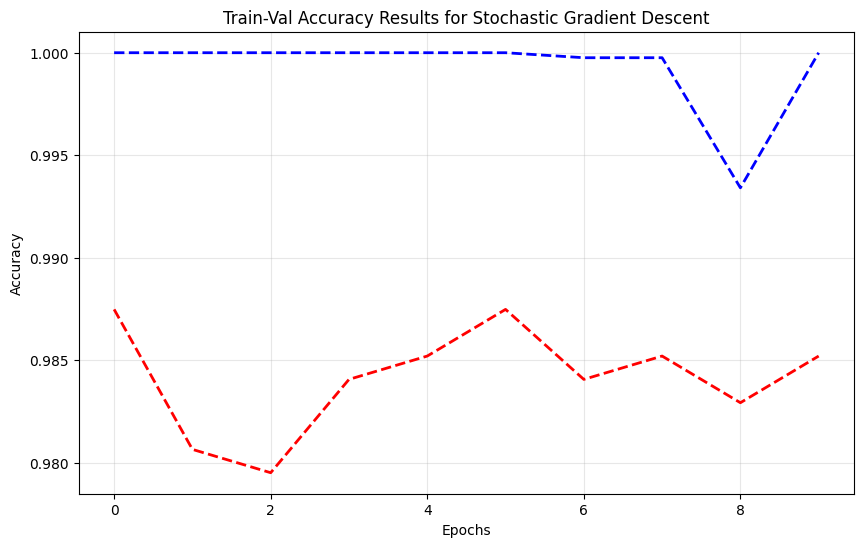

{'dataset': 'enron2_lemmatized_countvec', 'model': 'Stochastic Gradient Descent', 'type': 'normal', 'metrics': {'accuracy': 0.9829351535836177, 'weighted_precision': 0.9830390618536, 'wighted_recall': 0.9829351535836177, 'weighted_f1': 0.9829723255279642, 'macro_precision': 0.9755749844598796, 'macro_recall': 0.9797369138495093, 'macro_f1': 0.9776319561901886, 'roc_auc': 0.9797369138495092}, 'confusion_matrix': array([[646,   9],
       [  6, 218]], dtype=int64), 'epochs': 10}


Perceptron classification report


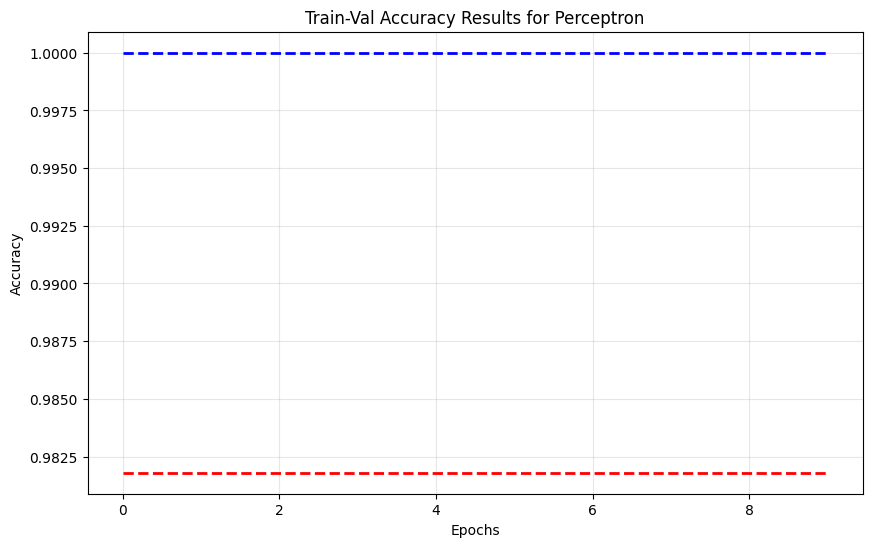

{'dataset': 'enron2_lemmatized_countvec', 'model': 'Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9783845278725825, 'weighted_precision': 0.9784194345580826, 'wighted_recall': 0.9783845278725825, 'weighted_f1': 0.9784003420713789, 'macro_precision': 0.9708970438328237, 'macro_recall': 0.9722771264994547, 'macro_f1': 0.9715844223901344, 'roc_auc': 0.9722771264994547}, 'confusion_matrix': array([[645,  10],
       [  9, 215]], dtype=int64), 'epochs': 10}


PassiveAggressiveClassifier classification report
LogisticRegression classification report


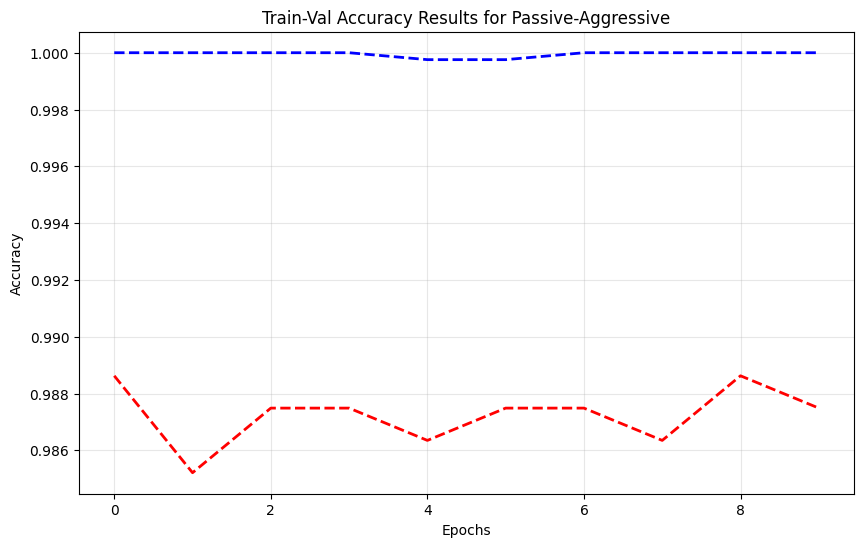

{'dataset': 'enron2_lemmatized_countvec', 'model': 'Passive-Aggressive', 'type': 'normal', 'metrics': {'accuracy': 0.9852104664391353, 'weighted_precision': 0.985235422979732, 'wighted_recall': 0.9852104664391353, 'weighted_f1': 0.9852212866804172, 'macro_precision': 0.9798572884811417, 'macro_recall': 0.9812636314067611, 'macro_f1': 0.9805577626879868, 'roc_auc': 0.9812636314067611}, 'confusion_matrix': array([[648,   7],
       [  6, 218]], dtype=int64), 'epochs': 10}




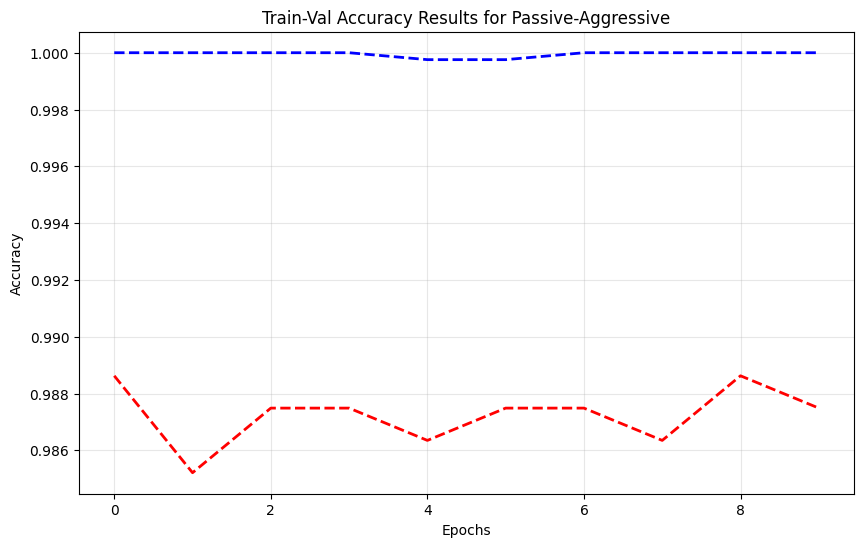

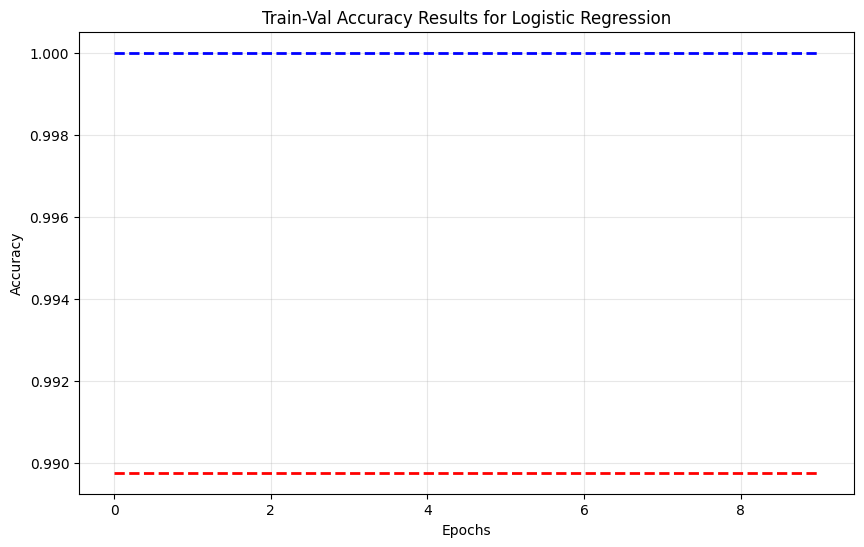

{'dataset': 'enron2_lemmatized_countvec', 'model': 'Logistic Regression', 'type': 'normal', 'metrics': {'accuracy': 0.9897610921501706, 'weighted_precision': 0.9897794152608318, 'wighted_recall': 0.9897610921501706, 'weighted_f1': 0.9897685830864427, 'macro_precision': 0.9858307849133536, 'macro_recall': 0.9872546346782988, 'macro_f1': 0.9865399895532215, 'roc_auc': 0.9872546346782989}, 'confusion_matrix': array([[650,   5],
       [  4, 220]], dtype=int64), 'epochs': 10}


SVC classification report


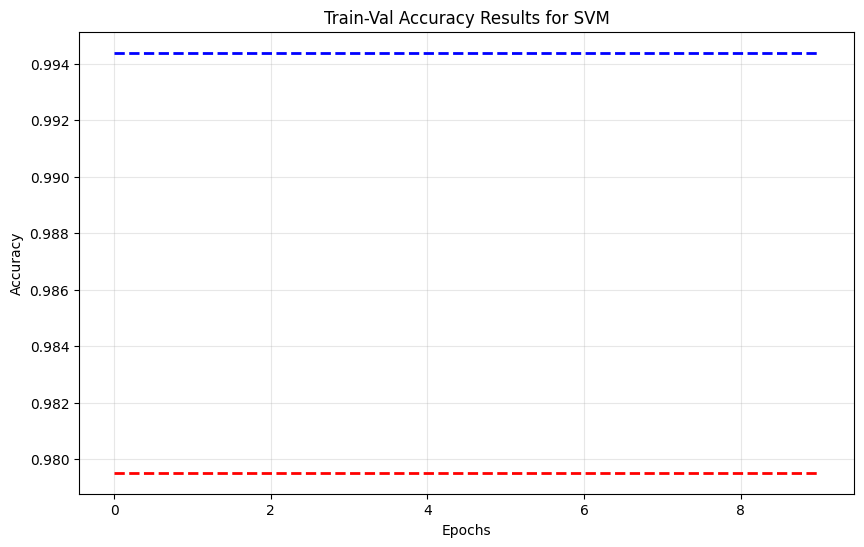

{'dataset': 'enron2_lemmatized_countvec', 'model': 'SVM', 'type': 'normal', 'metrics': {'accuracy': 0.981797497155859, 'weighted_precision': 0.9817424426828478, 'wighted_recall': 0.981797497155859, 'weighted_f1': 0.9817432093835853, 'macro_precision': 0.9787763829493723, 'macro_recall': 0.9730984187568157, 'macro_f1': 0.9758937019210991, 'roc_auc': 0.9730984187568157}, 'confusion_matrix': array([[649,   6],
       [ 10, 214]], dtype=int64), 'epochs': 10}


MLPClassifier classification report


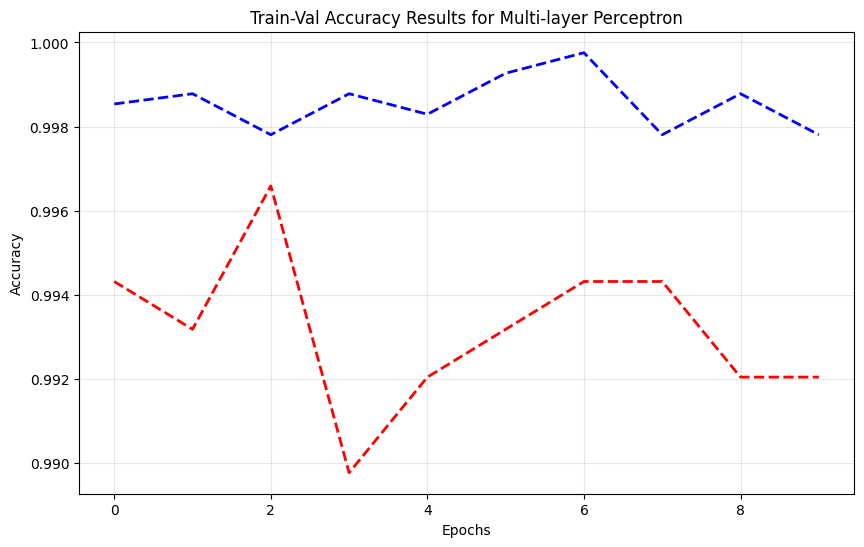

{'dataset': 'enron2_lemmatized_countvec', 'model': 'Multi-layer Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9920364050056882, 'weighted_precision': 0.9920314528228857, 'wighted_recall': 0.9920364050056882, 'weighted_f1': 0.9920186592126546, 'macro_precision': 0.9916757210249075, 'macro_recall': 0.9873125681570338, 'macro_f1': 0.9894691802801715, 'roc_auc': 0.9873125681570337}, 'confusion_matrix': array([[653,   2],
       [  5, 219]], dtype=int64), 'epochs': 10}




In [7]:
train_and_evaluate_model(enron2_lemmatized_countvec_X, enron2_y, "enron2_lemmatized_countvec")
del enron2_lemmatized_countvec_X, enron2_y

enron3_lemmatized_countvec classification report


MultinomialNB classification report


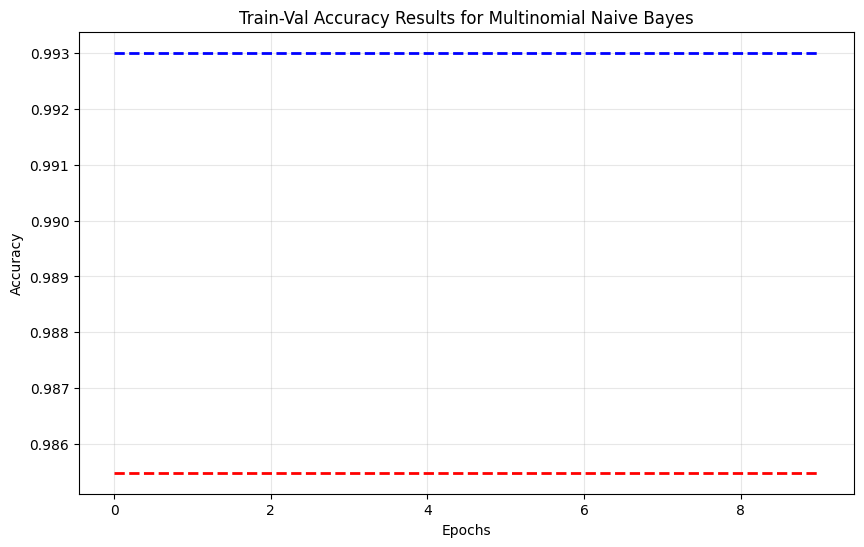

{'dataset': 'enron3_lemmatized_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9903264812575574, 'weighted_precision': 0.9903264812575574, 'wighted_recall': 0.9903264812575574, 'weighted_f1': 0.9903264812575574, 'macro_precision': 0.9882304386189622, 'macro_recall': 0.9882304386189622, 'macro_f1': 0.9882304386189622, 'roc_auc': 0.9882304386189621}, 'confusion_matrix': array([[584,   4],
       [  4, 235]], dtype=int64), 'epochs': 10}


BernoulliNB classification report


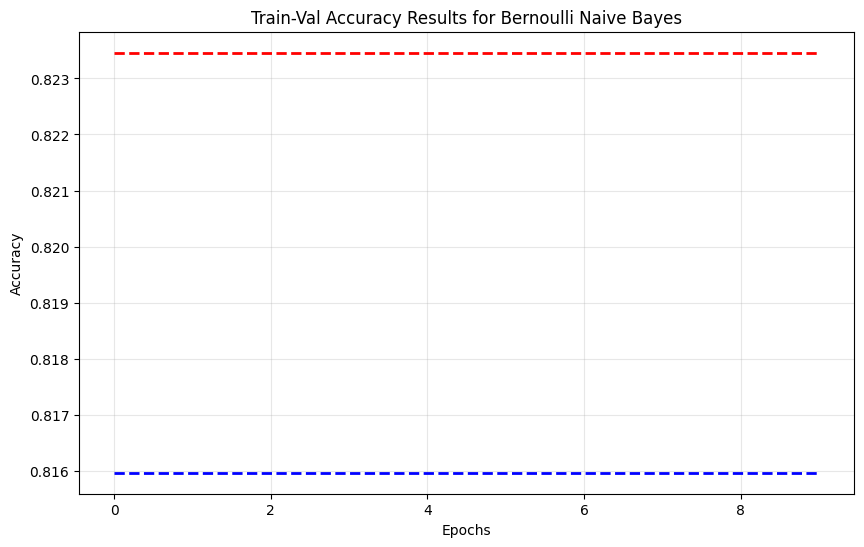

{'dataset': 'enron3_lemmatized_countvec', 'model': 'Bernoulli Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.8174123337363967, 'weighted_precision': 0.8823983102213921, 'wighted_recall': 0.8174123337363967, 'weighted_f1': 0.8257969419438022, 'macro_precision': 0.8030972410141772, 'macro_recall': 0.8666317991631799, 'macro_f1': 0.8053338072278262, 'roc_auc': 0.8666317991631799}, 'confusion_matrix': array([[441, 147],
       [  4, 235]], dtype=int64), 'epochs': 10}


DecisionTreeClassifier classification report


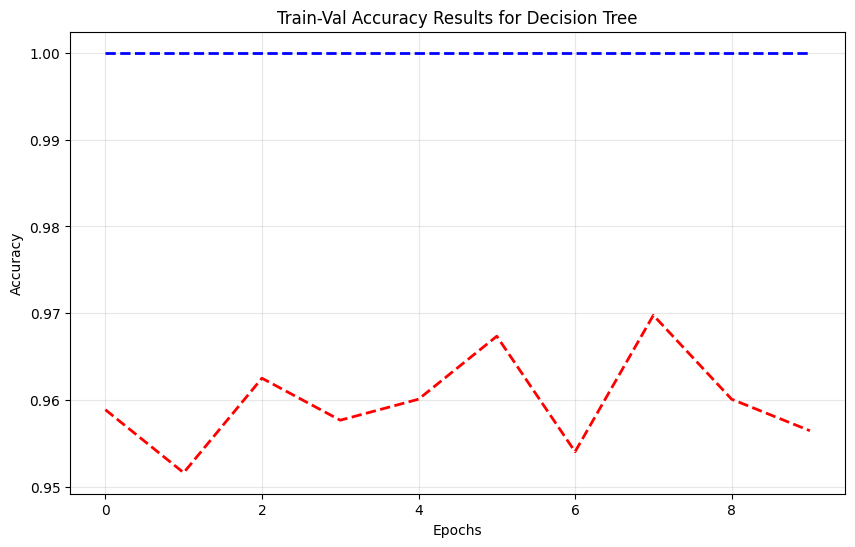

{'dataset': 'enron3_lemmatized_countvec', 'model': 'Decision Tree', 'type': 'normal', 'metrics': {'accuracy': 0.9528415961305925, 'weighted_precision': 0.9526938155084034, 'wighted_recall': 0.9528415961305925, 'weighted_f1': 0.9527526728245149, 'macro_precision': 0.9440979093177321, 'macro_recall': 0.9407608231577149, 'macro_f1': 0.9424079282174903, 'roc_auc': 0.940760823157715}, 'confusion_matrix': array([[570,  18],
       [ 21, 218]], dtype=int64), 'epochs': 10}


AdaBoostClassifier classification report


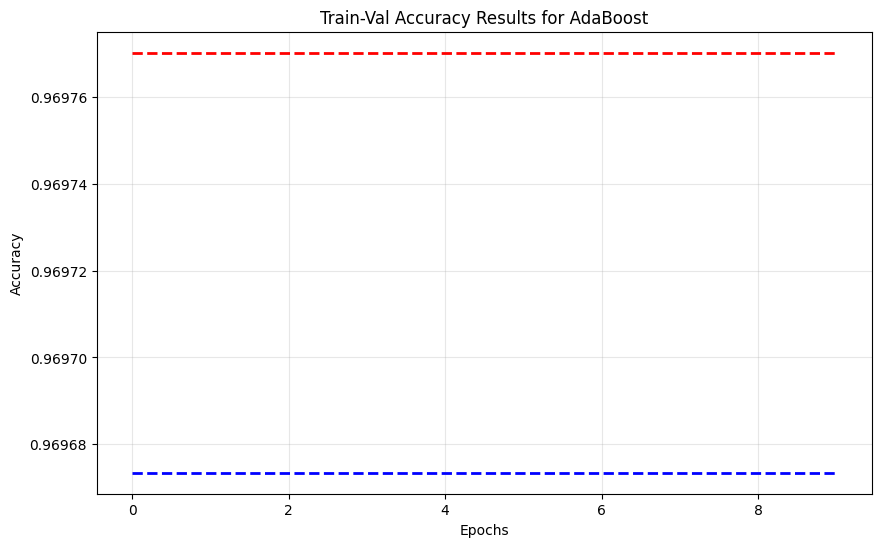

{'dataset': 'enron3_lemmatized_countvec', 'model': 'AdaBoost', 'type': 'normal', 'metrics': {'accuracy': 0.969770253929867, 'weighted_precision': 0.9707914226798618, 'wighted_recall': 0.969770253929867, 'weighted_f1': 0.9700014901821227, 'macro_precision': 0.9570841959972395, 'macro_recall': 0.9712912361597359, 'macro_f1': 0.9637936861792575, 'roc_auc': 0.9712912361597359}, 'confusion_matrix': array([[569,  19],
       [  6, 233]], dtype=int64), 'epochs': 10}


RandomForestClassifier classification report


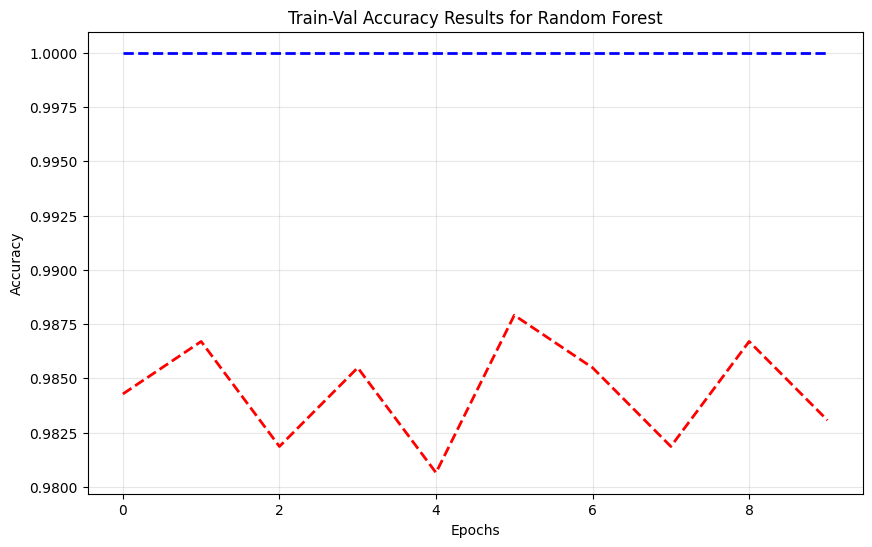

{'dataset': 'enron3_lemmatized_countvec', 'model': 'Random Forest', 'type': 'normal', 'metrics': {'accuracy': 0.9782345828295043, 'weighted_precision': 0.9781943236801015, 'wighted_recall': 0.9782345828295043, 'weighted_f1': 0.9781514854891497, 'macro_precision': 0.9770234534183032, 'macro_recall': 0.9697933566732132, 'macro_f1': 0.9733179901918609, 'roc_auc': 0.9697933566732132}, 'confusion_matrix': array([[582,   6],
       [ 12, 227]], dtype=int64), 'epochs': 10}


LogisticRegression classification report


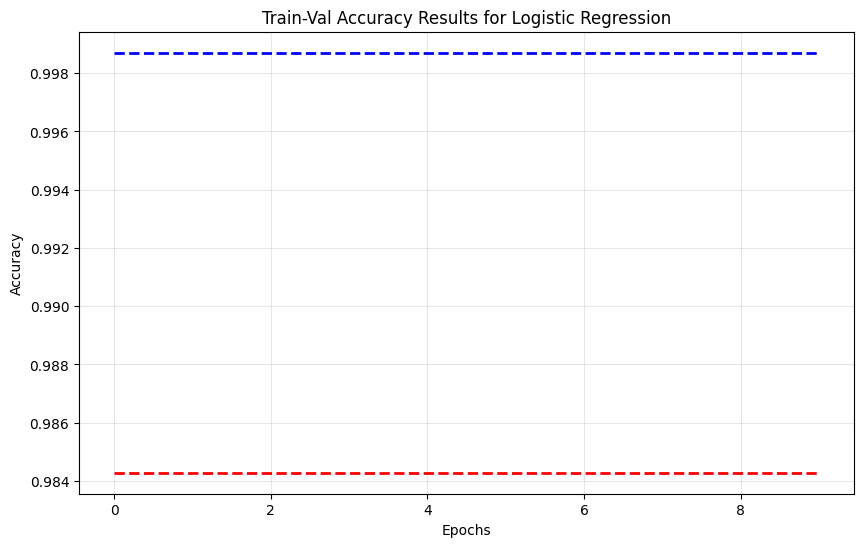

{'dataset': 'enron3_lemmatized_countvec', 'model': 'Logistic Regression', 'type': 'normal', 'metrics': {'accuracy': 0.9903264812575574, 'weighted_precision': 0.9903264812575574, 'wighted_recall': 0.9903264812575574, 'weighted_f1': 0.9903264812575574, 'macro_precision': 0.9882304386189622, 'macro_recall': 0.9882304386189622, 'macro_f1': 0.9882304386189622, 'roc_auc': 0.9882304386189621}, 'confusion_matrix': array([[584,   4],
       [  4, 235]], dtype=int64), 'epochs': 10}


KNeighborsClassifier classification report


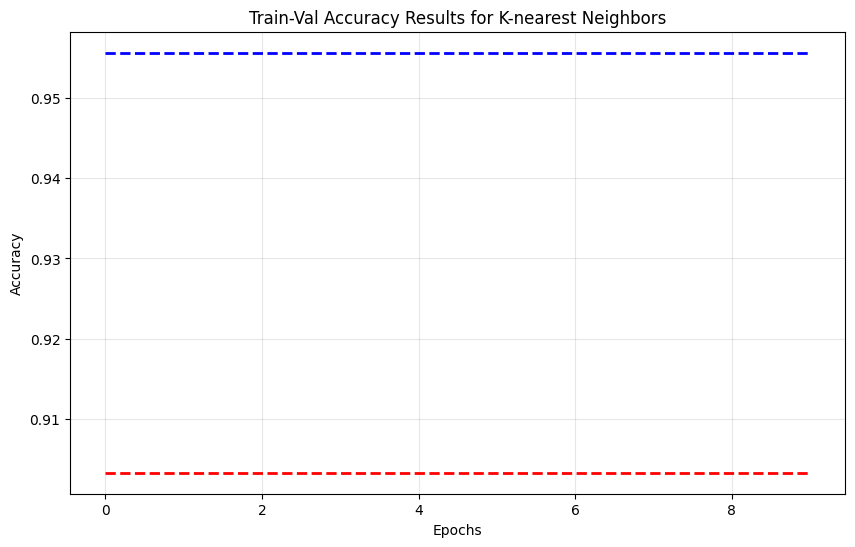

{'dataset': 'enron3_lemmatized_countvec', 'model': 'K-nearest Neighbors', 'type': 'normal', 'metrics': {'accuracy': 0.875453446191052, 'weighted_precision': 0.8806878018134008, 'wighted_recall': 0.875453446191052, 'weighted_f1': 0.8771959487531814, 'macro_precision': 0.8441519995694063, 'macro_recall': 0.8639882731335211, 'macro_f1': 0.8528706129858555, 'roc_auc': 0.8639882731335211}, 'confusion_matrix': array([[524,  64],
       [ 39, 200]], dtype=int64), 'epochs': 10}


SGDClassifier classification report


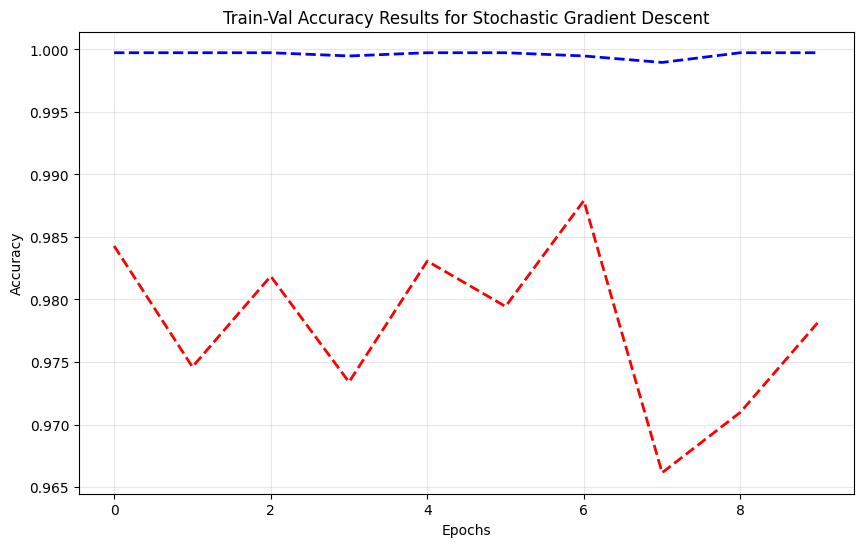

{'dataset': 'enron3_lemmatized_countvec', 'model': 'Stochastic Gradient Descent', 'type': 'normal', 'metrics': {'accuracy': 0.9830713422007256, 'weighted_precision': 0.9830429089875155, 'wighted_recall': 0.9830713422007256, 'weighted_f1': 0.9830501484708332, 'macro_precision': 0.9805621111349496, 'macro_recall': 0.9781615575100333, 'macro_f1': 0.9793518426046142, 'roc_auc': 0.9781615575100332}, 'confusion_matrix': array([[582,   6],
       [  8, 231]], dtype=int64), 'epochs': 10}


Perceptron classification report


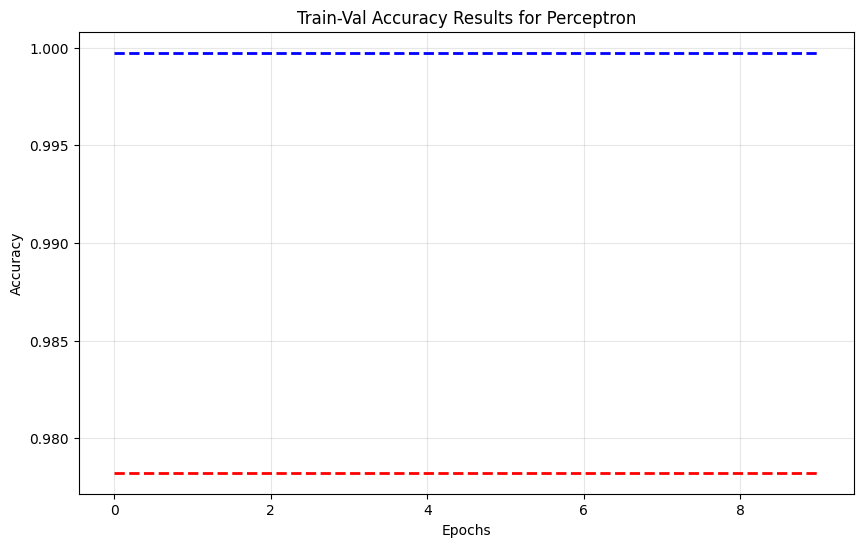

{'dataset': 'enron3_lemmatized_countvec', 'model': 'Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9830713422007256, 'weighted_precision': 0.983041964241635, 'wighted_recall': 0.9830713422007256, 'weighted_f1': 0.9830286059052012, 'macro_precision': 0.9817603507763082, 'macro_recall': 0.9769198474368828, 'macro_f1': 0.979299864120718, 'roc_auc': 0.9769198474368828}, 'confusion_matrix': array([[583,   5],
       [  9, 230]], dtype=int64), 'epochs': 10}


PassiveAggressiveClassifier classification report


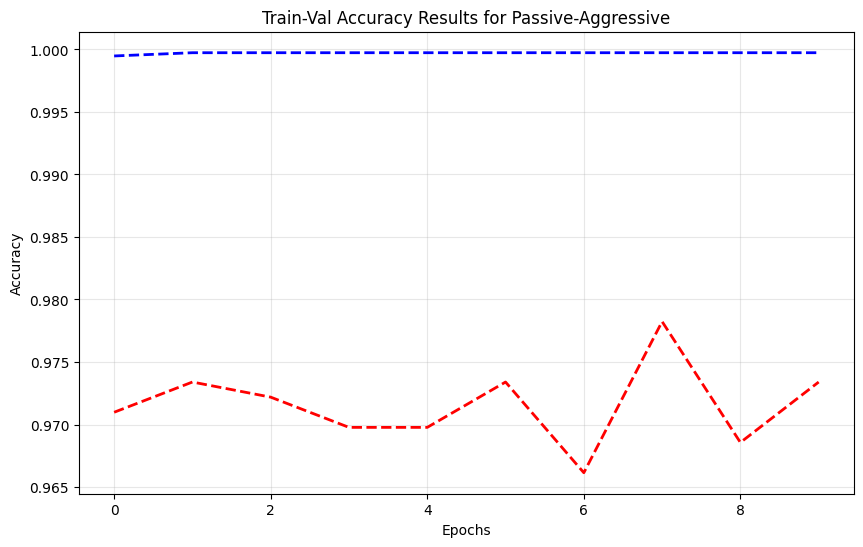

{'dataset': 'enron3_lemmatized_countvec', 'model': 'Passive-Aggressive', 'type': 'normal', 'metrics': {'accuracy': 0.9806529625151149, 'weighted_precision': 0.9806184241168302, 'wighted_recall': 0.9806529625151149, 'weighted_f1': 0.9806287411095236, 'macro_precision': 0.9776049488664807, 'macro_recall': 0.9752191671647739, 'macro_f1': 0.9764021058338446, 'roc_auc': 0.975219167164774}, 'confusion_matrix': array([[581,   7],
       [  9, 230]], dtype=int64), 'epochs': 10}


SVC classification report


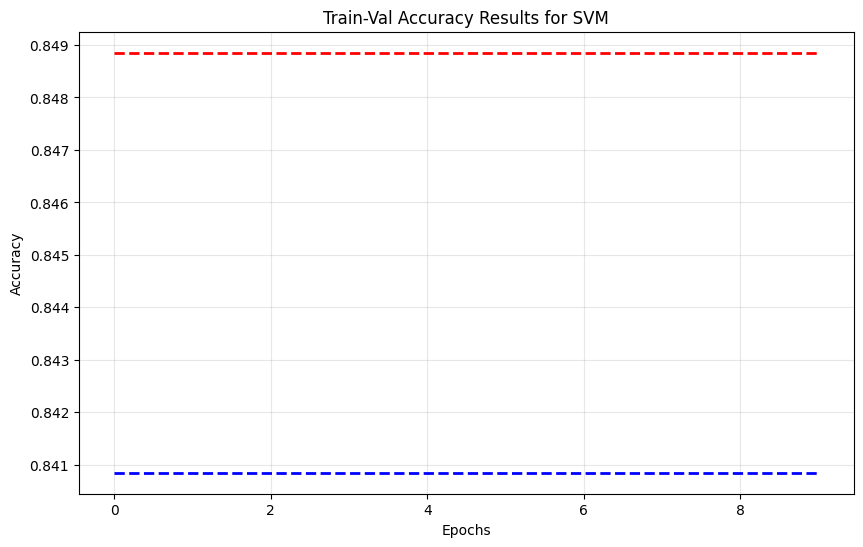

{'dataset': 'enron3_lemmatized_countvec', 'model': 'SVM', 'type': 'normal', 'metrics': {'accuracy': 0.814993954050786, 'weighted_precision': 0.8504743381474331, 'wighted_recall': 0.814993954050786, 'weighted_f1': 0.7828044565312249, 'macro_precision': 0.8914765038750154, 'macro_recall': 0.6811580280647824, 'macro_f1': 0.7084062139197888, 'roc_auc': 0.6811580280647824}, 'confusion_matrix': array([[587,   1],
       [152,  87]], dtype=int64), 'epochs': 10}


MLPClassifier classification report


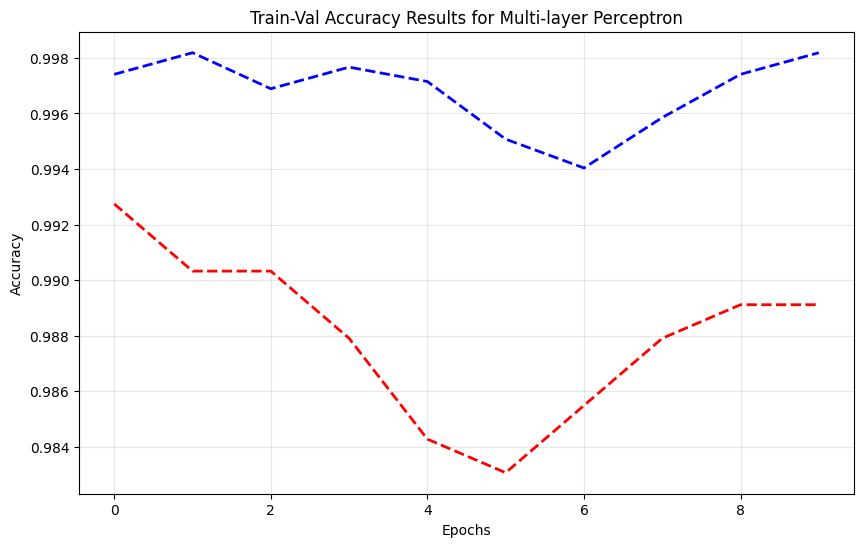

{'dataset': 'enron3_lemmatized_countvec', 'model': 'Multi-layer Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.992744860943168, 'weighted_precision': 0.9927651299965997, 'wighted_recall': 0.992744860943168, 'weighted_f1': 0.9927265453879435, 'macro_precision': 0.9936493674525589, 'macro_recall': 0.9886894088179206, 'macro_f1': 0.9911285131945935, 'roc_auc': 0.9886894088179204}, 'confusion_matrix': array([[587,   1],
       [  5, 234]], dtype=int64), 'epochs': 10}




In [8]:
train_and_evaluate_model(enron3_lemmatized_countvec_X, enron3_y, "enron3_lemmatized_countvec")
del enron3_lemmatized_countvec_X, enron3_y

enron4_lemmatized_countvec classification report
MultinomialNB classification report
BernoulliNB classification report

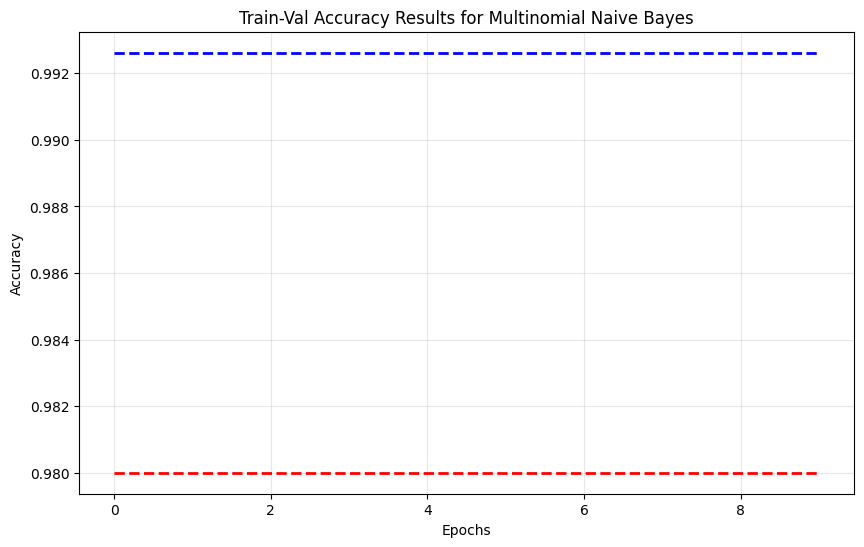


{'dataset': 'enron4_lemmatized_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.98, 'weighted_precision': 0.9802612309519098, 'wighted_recall': 0.98, 'weighted_f1': 0.9800766474528743, 'macro_precision': 0.9712052246190382, 'macro_recall': 0.9784847647516893, 'macro_f1': 0.9747624240535908, 'roc_auc': 0.9784847647516893}, 'confusion_matrix': array([[236,   6],
       [ 12, 646]], dtype=int64), 'epochs': 10}


{'dataset': 'enron4_lemmatized_countvec', 'model': 'Bernoulli Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.8466666666666667, 'weighted_precision': 0.8908559670781893, 'wighted_recall': 0.8466666666666667, 'weighted_f1': 0.8541428774794463, 'macro_precision': 0.812962962962963, 'macro_recall': 0.882074405285237, 'macro_f1': 0.8277860664784609, 'roc_auc': 0.882074405285237}, 'confusion_matrix': array([[232,  10],
       [128, 530]], dtype=int64), 'epochs': 10}


DecisionTreeClassifier classification report


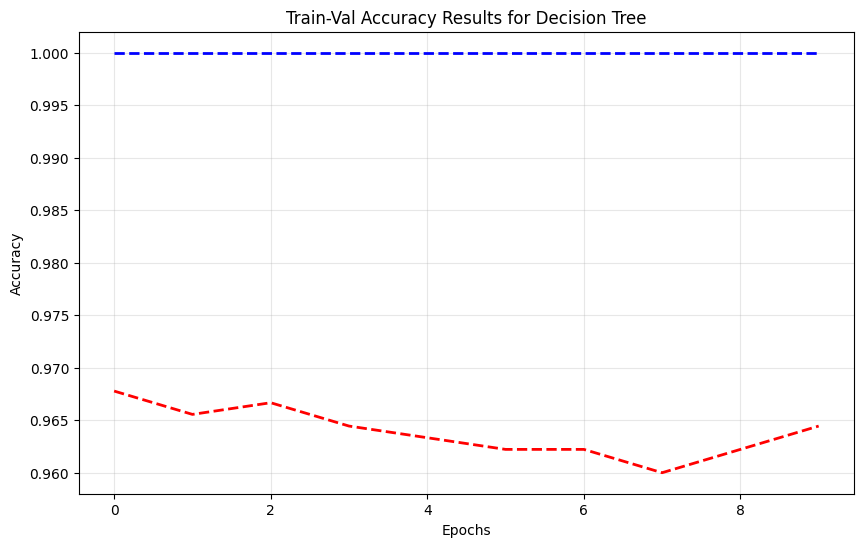

{'dataset': 'enron4_lemmatized_countvec', 'model': 'Decision Tree', 'type': 'normal', 'metrics': {'accuracy': 0.9644444444444444, 'weighted_precision': 0.9643038524573978, 'wighted_recall': 0.9644444444444444, 'weighted_f1': 0.9643501683501684, 'macro_precision': 0.9569930691309756, 'macro_recall': 0.9521716194830314, 'macro_f1': 0.9545454545454546, 'roc_auc': 0.9521716194830314}, 'confusion_matrix': array([[224,  18],
       [ 14, 644]], dtype=int64), 'epochs': 10}


AdaBoostClassifier classification report


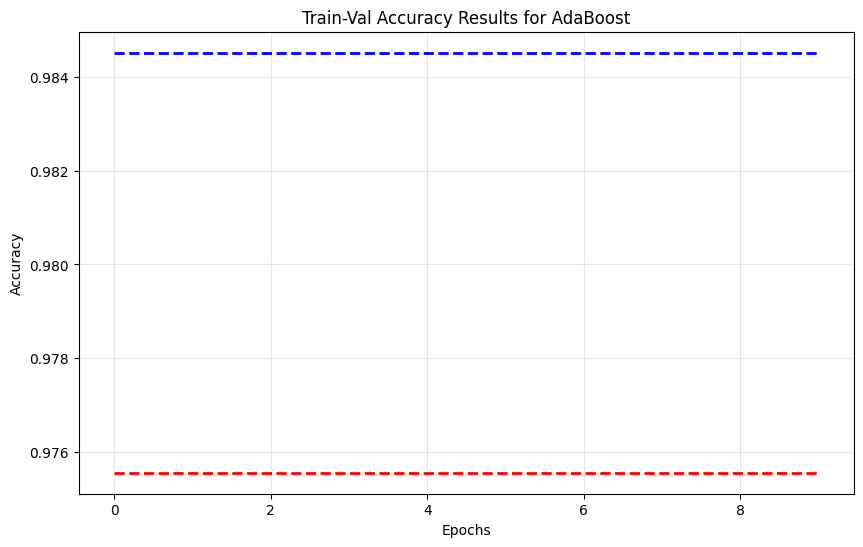

{'dataset': 'enron4_lemmatized_countvec', 'model': 'AdaBoost', 'type': 'normal', 'metrics': {'accuracy': 0.9733333333333334, 'weighted_precision': 0.9734320175438598, 'wighted_recall': 0.9733333333333334, 'weighted_f1': 0.9730765210899589, 'macro_precision': 0.9748981829573935, 'macro_recall': 0.9569444095556281, 'macro_f1': 0.9654455287154056, 'roc_auc': 0.9569444095556282}, 'confusion_matrix': array([[223,  19],
       [  5, 653]], dtype=int64), 'epochs': 10}


RandomForestClassifier classification report


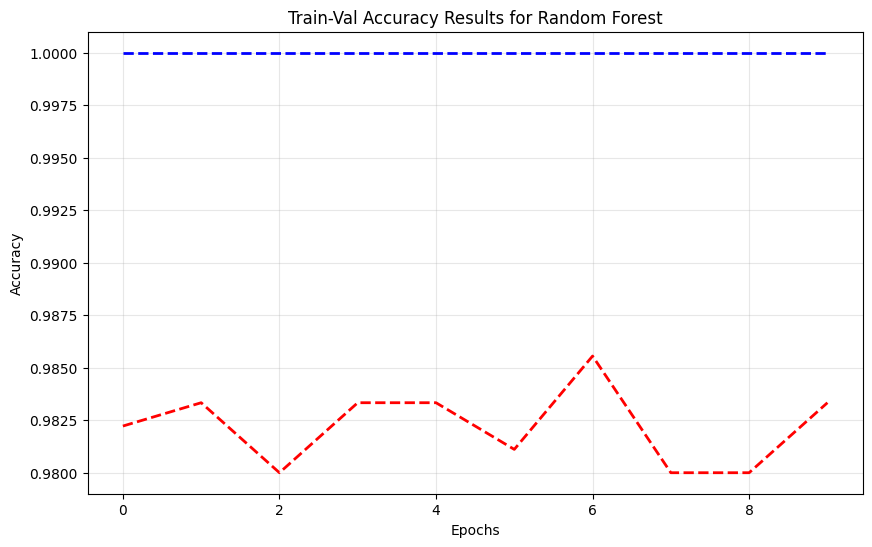

{'dataset': 'enron4_lemmatized_countvec', 'model': 'Random Forest', 'type': 'normal', 'metrics': {'accuracy': 0.9855555555555555, 'weighted_precision': 0.9858354032124524, 'wighted_recall': 0.9855555555555555, 'weighted_f1': 0.9854268623557348, 'macro_precision': 0.9903129657228018, 'macro_recall': 0.9731404958677685, 'macro_f1': 0.9813086799614672, 'roc_auc': 0.9731404958677685}, 'confusion_matrix': array([[229,  13],
       [  0, 658]], dtype=int64), 'epochs': 10}


SVC classification report


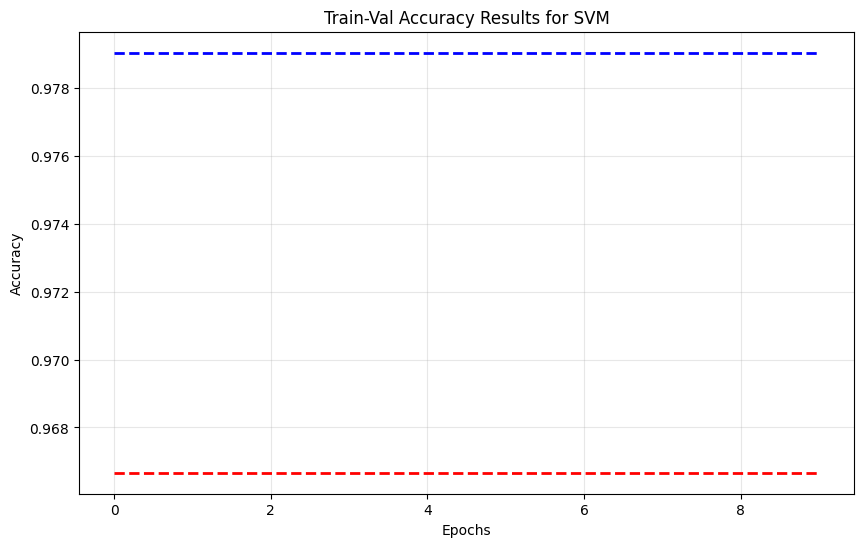

{'dataset': 'enron4_lemmatized_countvec', 'model': 'SVM', 'type': 'normal', 'metrics': {'accuracy': 0.9666666666666667, 'weighted_precision': 0.9681201550387597, 'wighted_recall': 0.9666666666666667, 'weighted_f1': 0.9659368161060237, 'macro_precision': 0.9781976744186047, 'macro_recall': 0.9380165289256198, 'macro_f1': 0.9558162216651065, 'roc_auc': 0.9380165289256198}, 'confusion_matrix': array([[212,  30],
       [  0, 658]], dtype=int64), 'epochs': 10}


SGDClassifier classification report


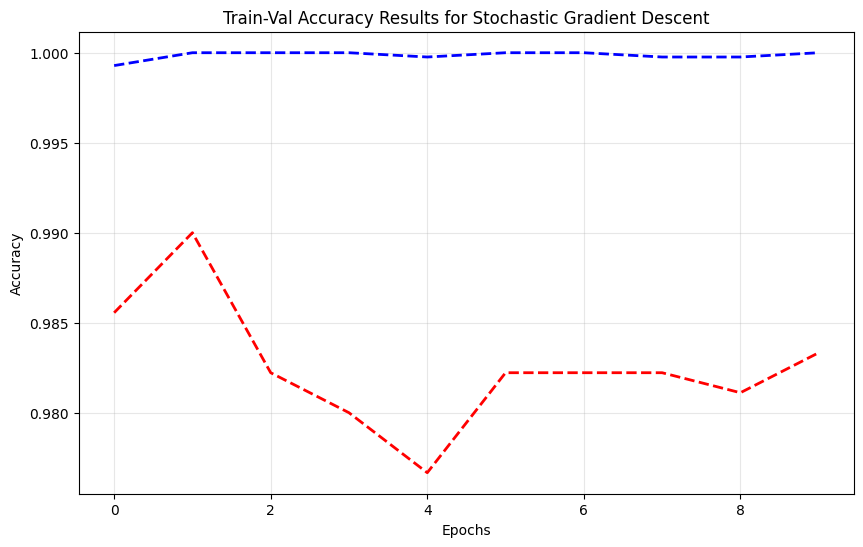

{'dataset': 'enron4_lemmatized_countvec', 'model': 'Stochastic Gradient Descent', 'type': 'normal', 'metrics': {'accuracy': 0.9877777777777778, 'weighted_precision': 0.9877648420179225, 'wighted_recall': 0.9877777777777778, 'weighted_f1': 0.987769765549304, 'macro_precision': 0.9850742039680391, 'macro_recall': 0.9838039136878596, 'macro_f1': 0.9844366785042232, 'roc_auc': 0.9838039136878596}, 'confusion_matrix': array([[236,   6],
       [  5, 653]], dtype=int64), 'epochs': 10}


Perceptron classification report


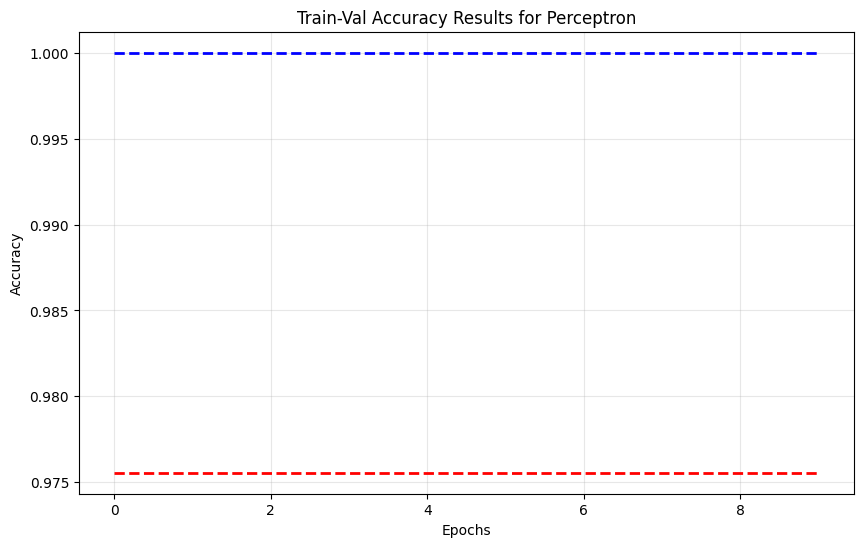

{'dataset': 'enron4_lemmatized_countvec', 'model': 'Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9733333333333334, 'weighted_precision': 0.9741543762138093, 'wighted_recall': 0.9733333333333334, 'weighted_f1': 0.9735332145919915, 'macro_precision': 0.9599229662855611, 'macro_recall': 0.973925494234972, 'macro_f1': 0.9666039976251732, 'roc_auc': 0.973925494234972}, 'confusion_matrix': array([[236,   6],
       [ 18, 640]], dtype=int64), 'epochs': 10}


PassiveAggressiveClassifier classification report


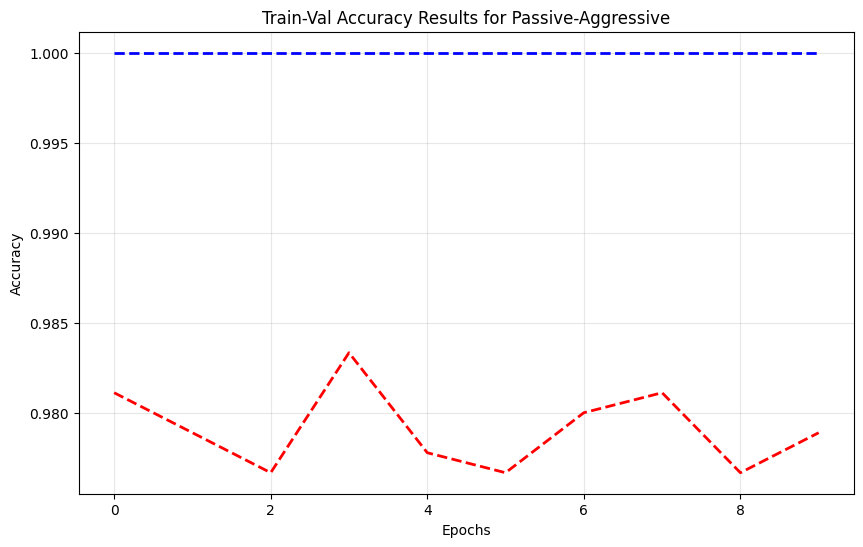

{'dataset': 'enron4_lemmatized_countvec', 'model': 'Passive-Aggressive', 'type': 'normal', 'metrics': {'accuracy': 0.9877777777777778, 'weighted_precision': 0.9877744896508859, 'wighted_recall': 0.9877777777777778, 'weighted_f1': 0.9877371180988515, 'macro_precision': 0.9876377035721786, 'macro_recall': 0.9811914391218066, 'macro_f1': 0.9843542328121766, 'roc_auc': 0.9811914391218066}, 'confusion_matrix': array([[234,   8],
       [  3, 655]], dtype=int64), 'epochs': 10}


LogisticRegression classification report


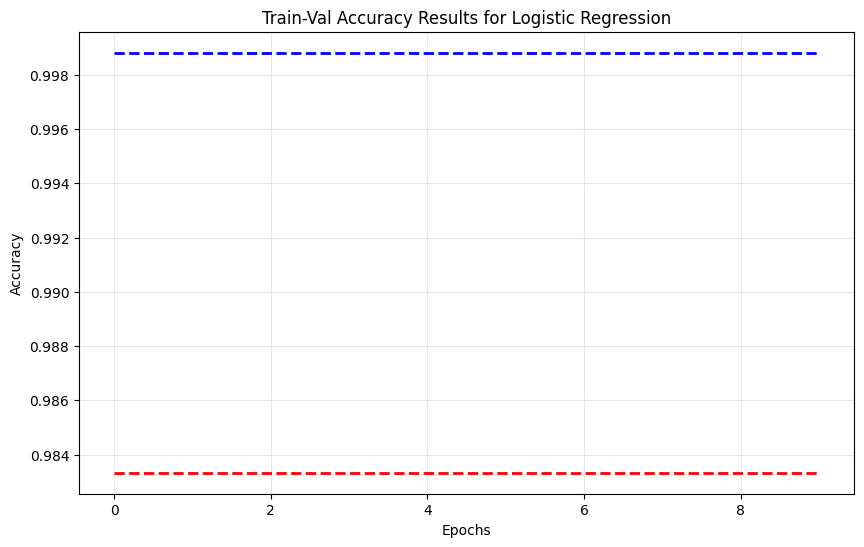

{'dataset': 'enron4_lemmatized_countvec', 'model': 'Logistic Regression', 'type': 'normal', 'metrics': {'accuracy': 0.9877777777777778, 'weighted_precision': 0.9878847843603235, 'wighted_recall': 0.9877777777777778, 'weighted_f1': 0.9877034977380558, 'macro_precision': 0.990357825379156, 'macro_recall': 0.9785789645557537, 'macro_f1': 0.9842701092353525, 'roc_auc': 0.9785789645557538}, 'confusion_matrix': array([[232,  10],
       [  1, 657]], dtype=int64), 'epochs': 10}


KNeighborsClassifier classification report


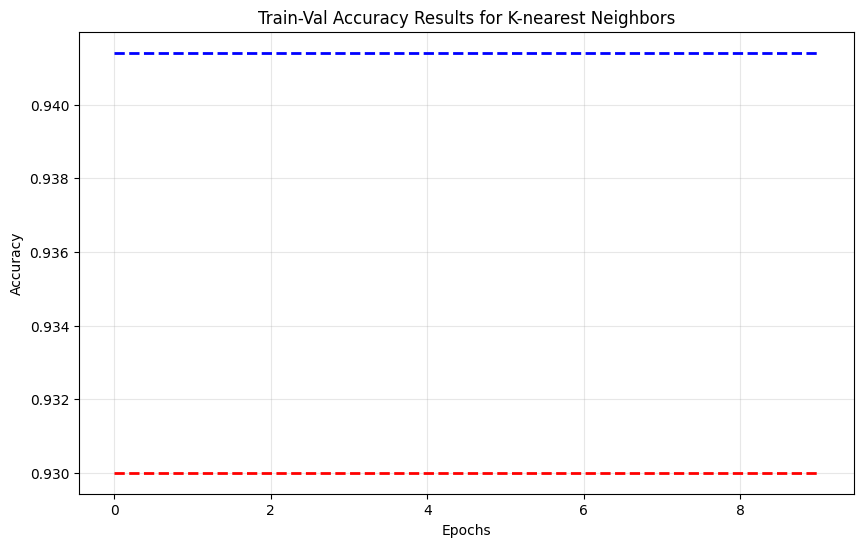

{'dataset': 'enron4_lemmatized_countvec', 'model': 'K-nearest Neighbors', 'type': 'normal', 'metrics': {'accuracy': 0.9333333333333333, 'weighted_precision': 0.9382934580195936, 'wighted_recall': 0.9333333333333333, 'weighted_f1': 0.9302020761151087, 'macro_precision': 0.9560814913772164, 'macro_recall': 0.8773392951342661, 'macro_f1': 0.9077434036533611, 'roc_auc': 0.8773392951342661}, 'confusion_matrix': array([[183,  59],
       [  1, 657]], dtype=int64), 'epochs': 10}


MLPClassifier classification report


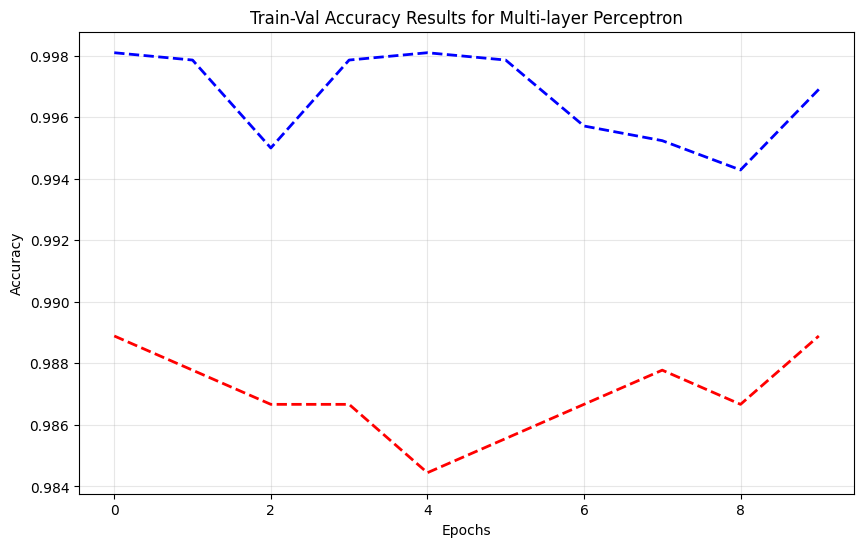

{'dataset': 'enron4_lemmatized_countvec', 'model': 'Multi-layer Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9944444444444445, 'weighted_precision': 0.9944506689004375, 'wighted_recall': 0.9944444444444445, 'weighted_f1': 0.9944334373447338, 'macro_precision': 0.9948822311826255, 'macro_recall': 0.9909756587706298, 'macro_f1': 0.9929071195181886, 'roc_auc': 0.9909756587706298}, 'confusion_matrix': array([[238,   4],
       [  1, 657]], dtype=int64), 'epochs': 10}




In [9]:
train_and_evaluate_model(enron4_lemmatized_countvec_X, enron4_y, "enron4_lemmatized_countvec")
del enron4_lemmatized_countvec_X, enron4_y

enron5_lemmatized_countvec classification report
MultinomialNB classification report


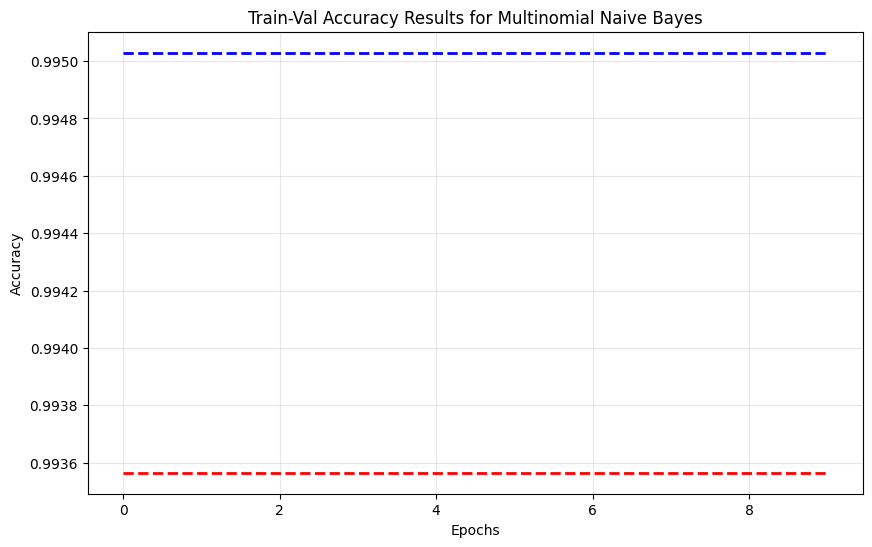

BernoulliNB classification report
{'dataset': 'enron5_lemmatized_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9948519948519948, 'weighted_precision': 0.9948805564275353, 'wighted_recall': 0.9948519948519948, 'weighted_f1': 0.9948584234298521, 'macro_precision': 0.9926170515659601, 'macro_recall': 0.9950838566091726, 'macro_f1': 0.9938394938394939, 'roc_auc': 0.9950838566091725}, 'confusion_matrix': array([[229,   1],
       [  3, 544]], dtype=int64), 'epochs': 10}




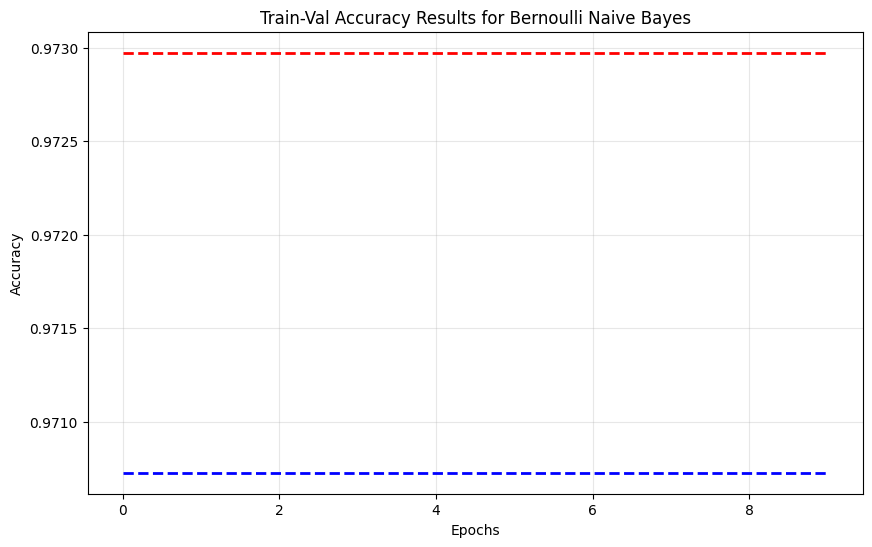

{'dataset': 'enron5_lemmatized_countvec', 'model': 'Bernoulli Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9742599742599742, 'weighted_precision': 0.9751679116758483, 'wighted_recall': 0.9742599742599742, 'weighted_f1': 0.9739060331519935, 'macro_precision': 0.982363315696649, 'macro_recall': 0.9565217391304348, 'macro_f1': 0.968296066590501, 'roc_auc': 0.9565217391304348}, 'confusion_matrix': array([[210,  20],
       [  0, 547]], dtype=int64), 'epochs': 10}


DecisionTreeClassifier classification report


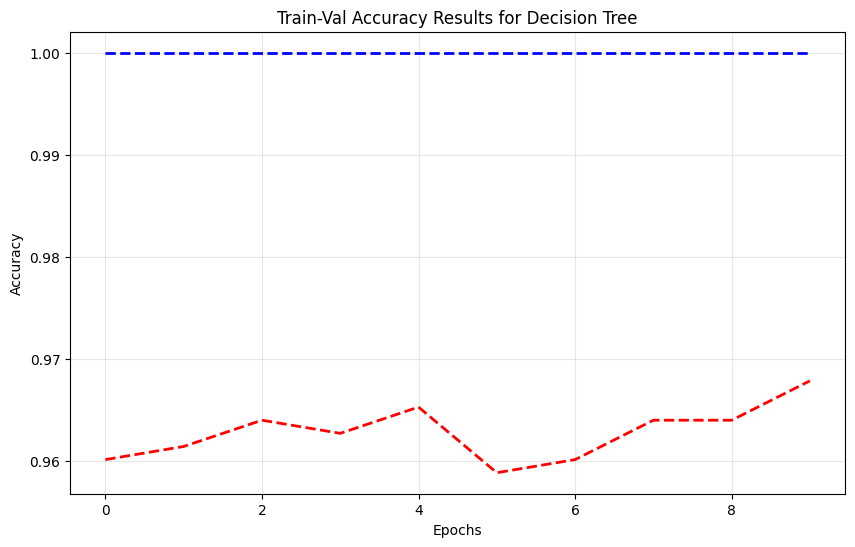

{'dataset': 'enron5_lemmatized_countvec', 'model': 'Decision Tree', 'type': 'normal', 'metrics': {'accuracy': 0.9626769626769627, 'weighted_precision': 0.962849829352922, 'wighted_recall': 0.9626769626769627, 'weighted_f1': 0.9627465647444544, 'macro_precision': 0.9537167066397374, 'macro_recall': 0.957113901915587, 'macro_f1': 0.9553919462794946, 'roc_auc': 0.9571139019155869}, 'confusion_matrix': array([[217,  13],
       [ 16, 531]], dtype=int64), 'epochs': 10}


AdaBoostClassifier classification report


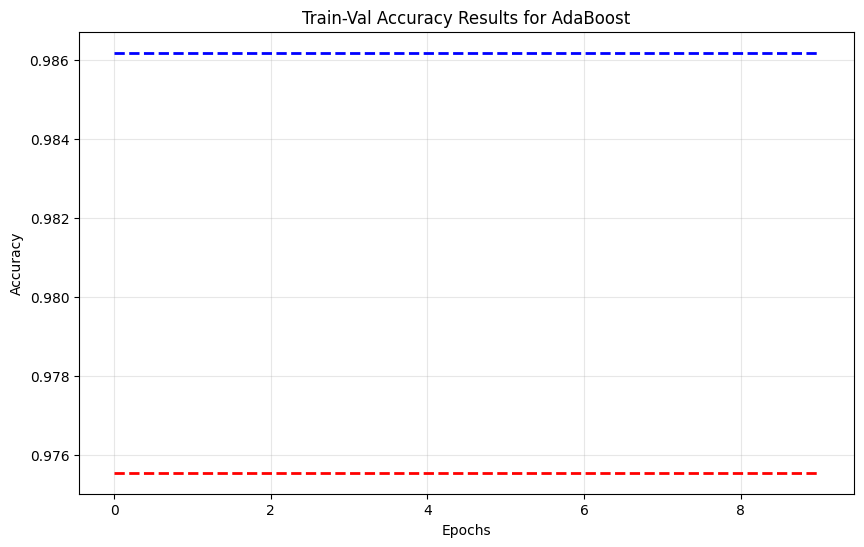

{'dataset': 'enron5_lemmatized_countvec', 'model': 'AdaBoost', 'type': 'normal', 'metrics': {'accuracy': 0.9703989703989704, 'weighted_precision': 0.9703197034873712, 'wighted_recall': 0.9703989703989704, 'weighted_f1': 0.9702643644213922, 'macro_precision': 0.9685248741318742, 'macro_recall': 0.9600786900882283, 'macro_f1': 0.9641686365796296, 'roc_auc': 0.9600786900882283}, 'confusion_matrix': array([[215,  15],
       [  8, 539]], dtype=int64), 'epochs': 10}


RandomForestClassifier classification report


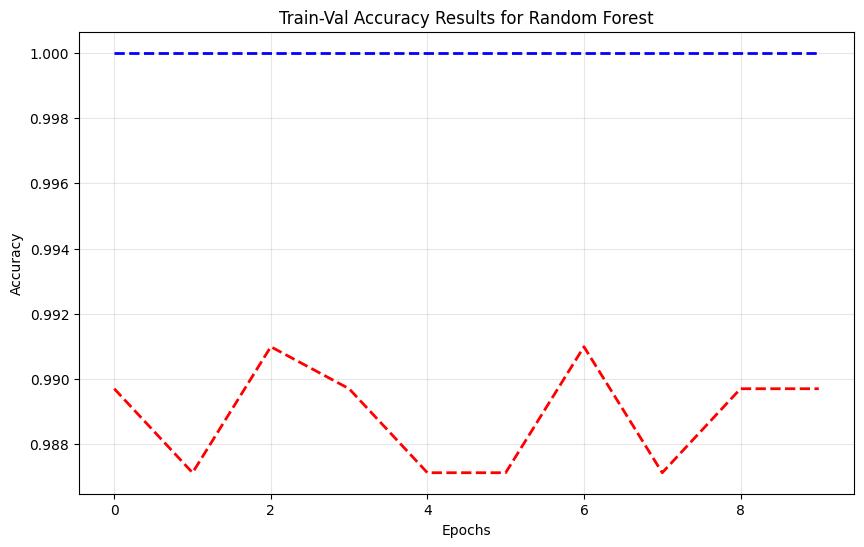

{'dataset': 'enron5_lemmatized_countvec', 'model': 'Random Forest', 'type': 'normal', 'metrics': {'accuracy': 0.9871299871299871, 'weighted_precision': 0.9872505710343549, 'wighted_recall': 0.9871299871299871, 'weighted_f1': 0.9870628083210194, 'macro_precision': 0.9896396396396396, 'macro_recall': 0.979520705826246, 'macro_f1': 0.9844008480156755, 'roc_auc': 0.979520705826246}, 'confusion_matrix': array([[221,   9],
       [  1, 546]], dtype=int64), 'epochs': 10}


KNeighborsClassifier classification report


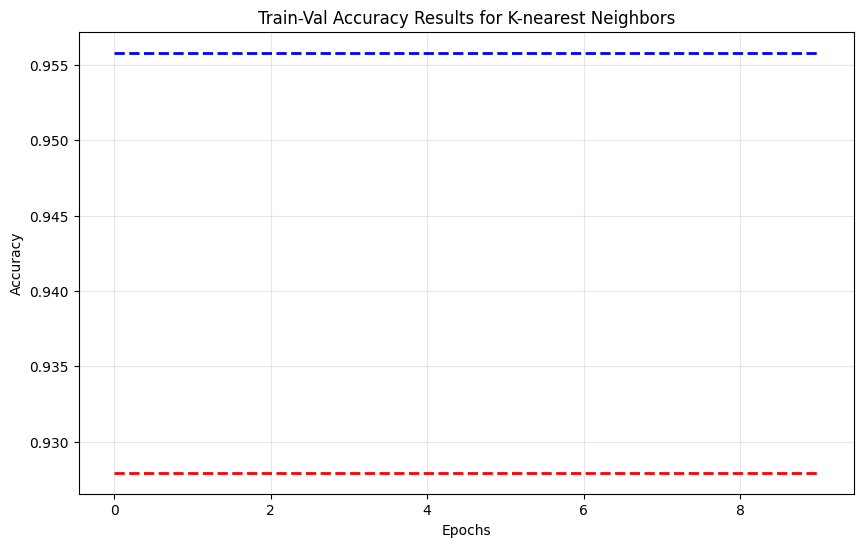

{'dataset': 'enron5_lemmatized_countvec', 'model': 'K-nearest Neighbors', 'type': 'normal', 'metrics': {'accuracy': 0.9279279279279279, 'weighted_precision': 0.9304121337679838, 'wighted_recall': 0.9279279279279279, 'weighted_f1': 0.9256394004355458, 'macro_precision': 0.9397870534262904, 'macro_recall': 0.8870797233924171, 'macro_f1': 0.908366466743042, 'roc_auc': 0.8870797233924171}, 'confusion_matrix': array([[181,  49],
       [  7, 540]], dtype=int64), 'epochs': 10}


SGDClassifier classification report


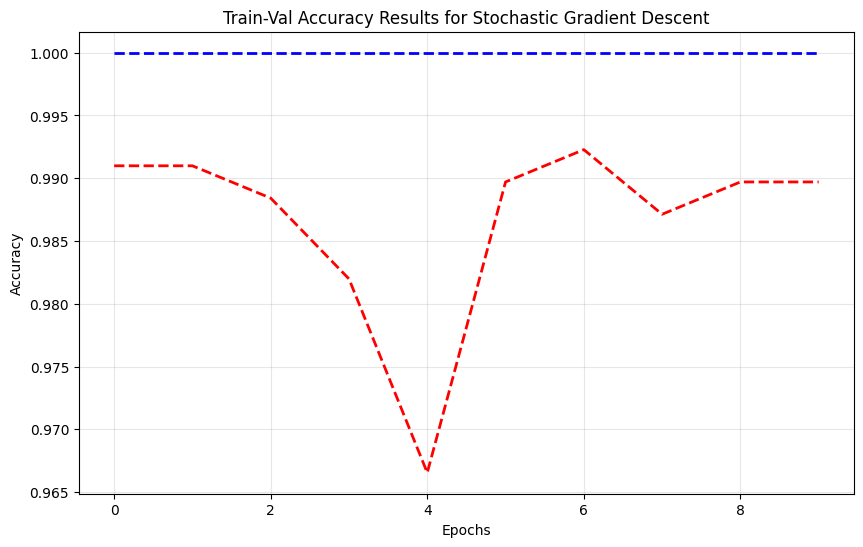

{'dataset': 'enron5_lemmatized_countvec', 'model': 'Stochastic Gradient Descent', 'type': 'normal', 'metrics': {'accuracy': 0.9832689832689833, 'weighted_precision': 0.9832400991872358, 'wighted_recall': 0.9832689832689833, 'weighted_f1': 0.9832369448749112, 'macro_precision': 0.9817140568682419, 'macro_recall': 0.9780383117399253, 'macro_f1': 0.9798515545679585, 'roc_auc': 0.9780383117399253}, 'confusion_matrix': array([[222,   8],
       [  5, 542]], dtype=int64), 'epochs': 10}


Perceptron classification report


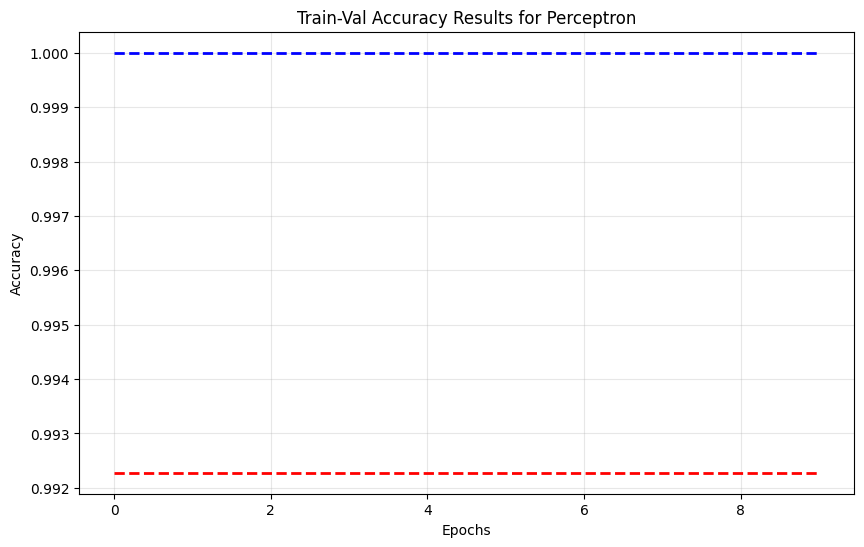

{'dataset': 'enron5_lemmatized_countvec', 'model': 'Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9845559845559846, 'weighted_precision': 0.9845396135969993, 'wighted_recall': 0.9845559845559846, 'weighted_f1': 0.9845163788218144, 'macro_precision': 0.9838909143472045, 'macro_recall': 0.978952388522375, 'macro_f1': 0.981377624388841, 'roc_auc': 0.9789523885223749}, 'confusion_matrix': array([[222,   8],
       [  4, 543]], dtype=int64), 'epochs': 10}


PassiveAggressiveClassifier classification report


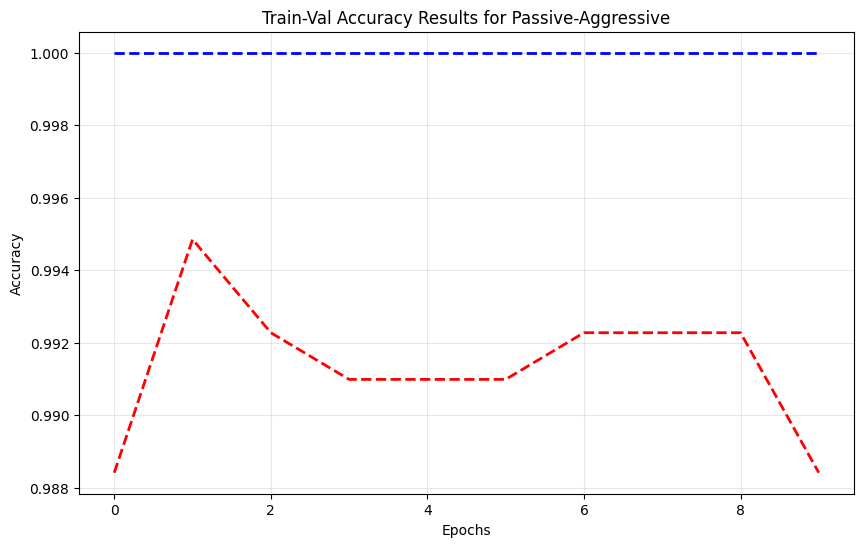

{'dataset': 'enron5_lemmatized_countvec', 'model': 'Passive-Aggressive', 'type': 'normal', 'metrics': {'accuracy': 0.9858429858429858, 'weighted_precision': 0.9859305919328641, 'wighted_recall': 0.9858429858429858, 'weighted_f1': 0.9858693866272069, 'macro_precision': 0.9813020701842969, 'macro_recall': 0.9849058103489389, 'macro_f1': 0.9830797037611876, 'roc_auc': 0.984905810348939}, 'confusion_matrix': array([[226,   4],
       [  7, 540]], dtype=int64), 'epochs': 10}


LogisticRegression classification report


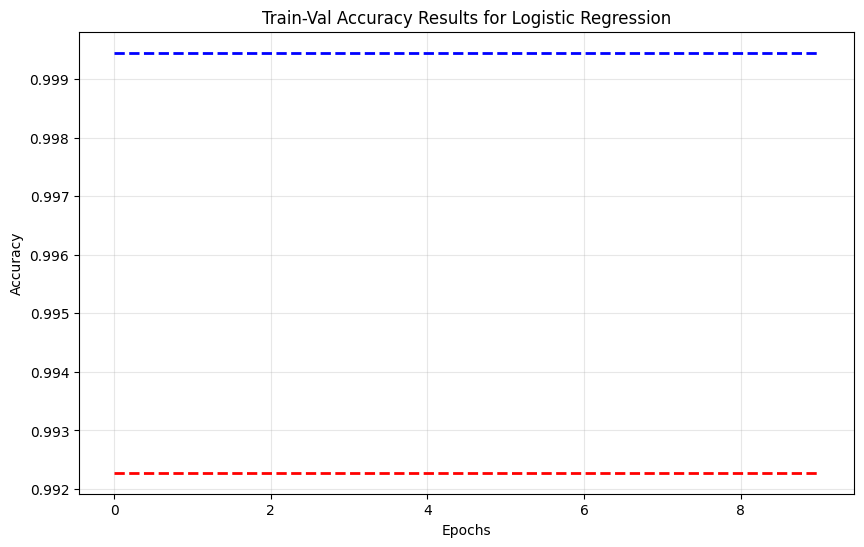

{'dataset': 'enron5_lemmatized_countvec', 'model': 'Logistic Regression', 'type': 'normal', 'metrics': {'accuracy': 0.9858429858429858, 'weighted_precision': 0.9858240905817999, 'wighted_recall': 0.9858429858429858, 'weighted_f1': 0.985815876432617, 'macro_precision': 0.9848257909491389, 'macro_recall': 0.9811263015658532, 'macro_f1': 0.9829513154036571, 'roc_auc': 0.9811263015658532}, 'confusion_matrix': array([[223,   7],
       [  4, 543]], dtype=int64), 'epochs': 10}


SVC classification report


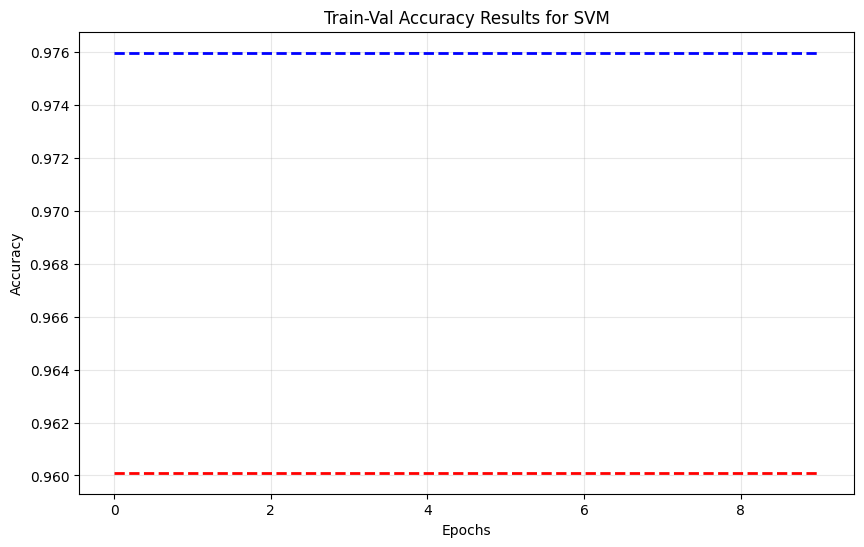

{'dataset': 'enron5_lemmatized_countvec', 'model': 'SVM', 'type': 'normal', 'metrics': {'accuracy': 0.9523809523809523, 'weighted_precision': 0.9541263741677576, 'wighted_recall': 0.9523809523809523, 'weighted_f1': 0.9513165353165353, 'macro_precision': 0.9630505468519066, 'macro_recall': 0.9233447261743899, 'macro_f1': 0.9404320124320125, 'roc_auc': 0.9233447261743899}, 'confusion_matrix': array([[196,  34],
       [  3, 544]], dtype=int64), 'epochs': 10}


MLPClassifier classification report


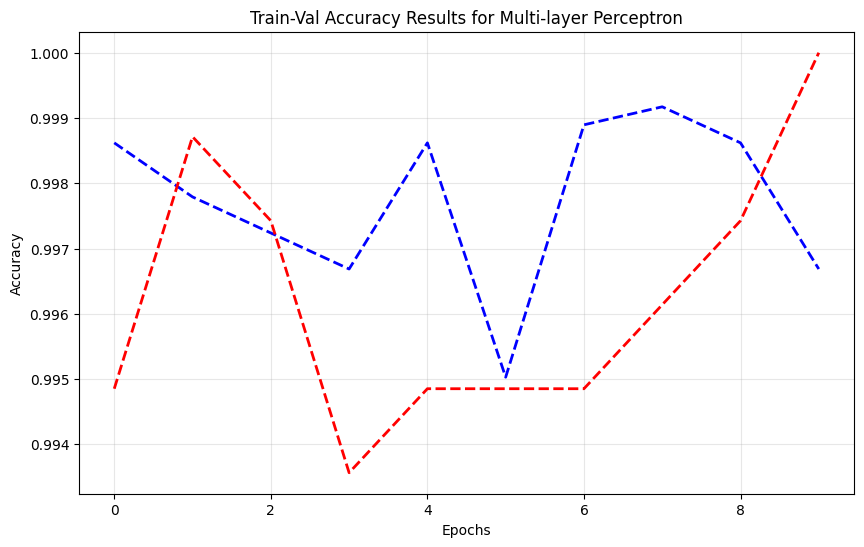

{'dataset': 'enron5_lemmatized_countvec', 'model': 'Multi-layer Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.990990990990991, 'weighted_precision': 0.9909835248821, 'wighted_recall': 0.990990990990991, 'weighted_f1': 0.9909852909584308, 'macro_precision': 0.9898001466228923, 'macro_recall': 0.9885621174787378, 'macro_f1': 0.9891783806368818, 'roc_auc': 0.9885621174787378}, 'confusion_matrix': array([[226,   4],
       [  3, 544]], dtype=int64), 'epochs': 10}




In [10]:
train_and_evaluate_model(enron5_lemmatized_countvec_X, enron5_y, "enron5_lemmatized_countvec")
del enron5_lemmatized_countvec_X, enron5_y

enron6_lemmatized_countvec classification report
MultinomialNB classification report


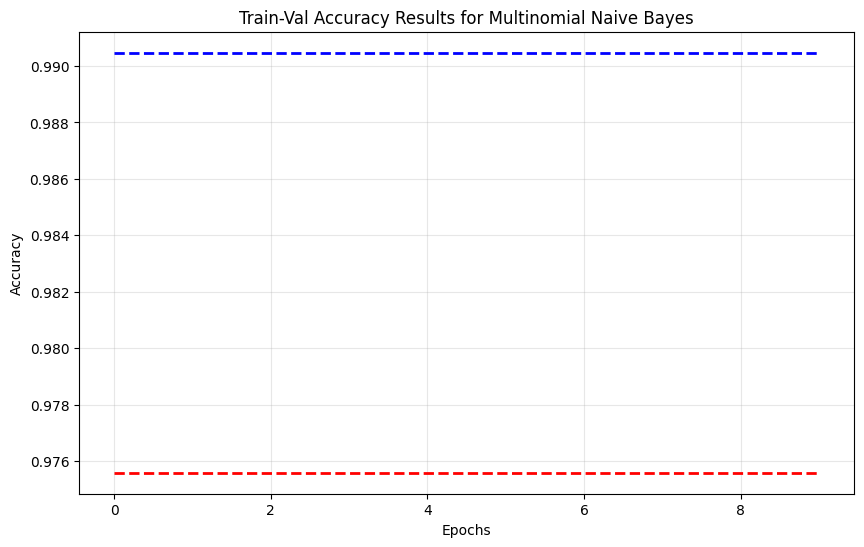

{'dataset': 'enron6_lemmatized_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9822222222222222, 'weighted_precision': 0.9824533604252792, 'wighted_recall': 0.9822222222222222, 'weighted_f1': 0.982284981021394, 'macro_precision': 0.9748643227582385, 'macro_recall': 0.9816178042775718, 'macro_f1': 0.9781638198757764, 'roc_auc': 0.9816178042775718}, 'confusion_matrix': array([[248,   5],
       [ 11, 636]], dtype=int64), 'epochs': 10}


BernoulliNB classification report


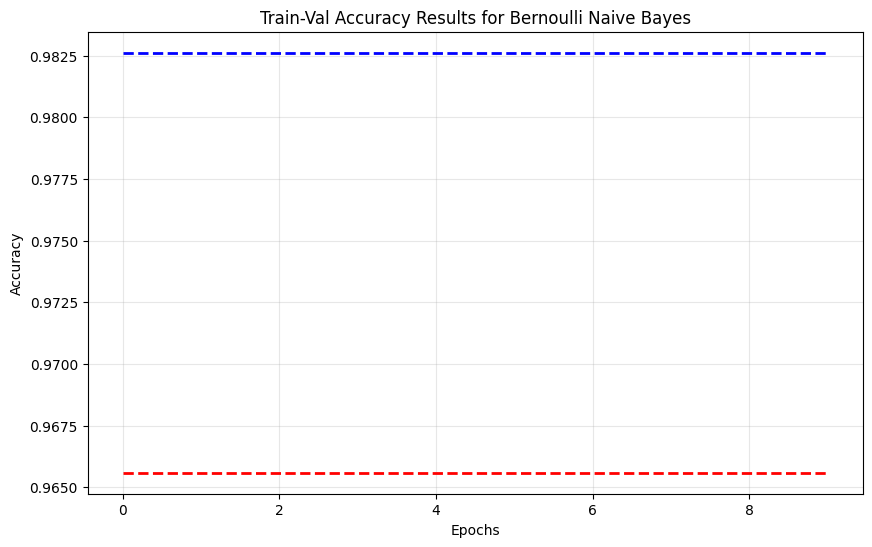

{'dataset': 'enron6_lemmatized_countvec', 'model': 'Bernoulli Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9622222222222222, 'weighted_precision': 0.9620789983846041, 'wighted_recall': 0.9622222222222222, 'weighted_f1': 0.9619369407537377, 'macro_precision': 0.9597277403837072, 'macro_recall': 0.9460446817479276, 'macro_f1': 0.9525701992051634, 'roc_auc': 0.9460446817479276}, 'confusion_matrix': array([[230,  23],
       [ 11, 636]], dtype=int64), 'epochs': 10}


DecisionTreeClassifier classification report


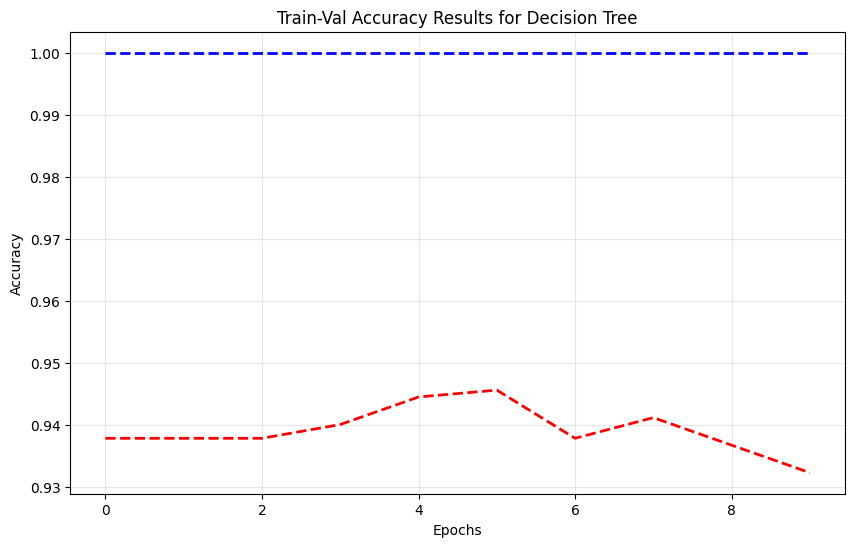

{'dataset': 'enron6_lemmatized_countvec', 'model': 'Decision Tree', 'type': 'normal', 'metrics': {'accuracy': 0.9544444444444444, 'weighted_precision': 0.9542371968247686, 'wighted_recall': 0.9544444444444444, 'weighted_f1': 0.9543047955922899, 'macro_precision': 0.9460716406095389, 'macro_recall': 0.9406350990585921, 'macro_f1': 0.9433004660425108, 'roc_auc': 0.9406350990585921}, 'confusion_matrix': array([[230,  23],
       [ 18, 629]], dtype=int64), 'epochs': 10}


AdaBoostClassifier classification report


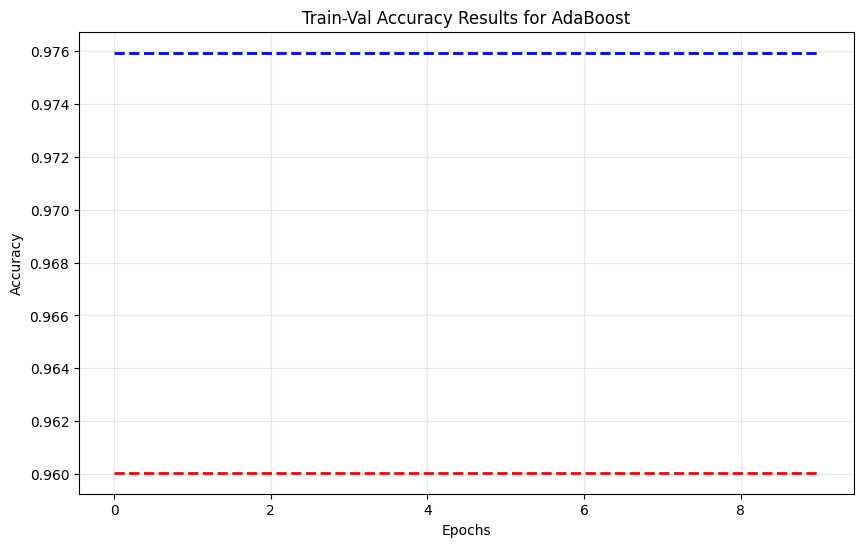

{'dataset': 'enron6_lemmatized_countvec', 'model': 'AdaBoost', 'type': 'normal', 'metrics': {'accuracy': 0.96, 'weighted_precision': 0.9611763848686171, 'wighted_recall': 0.96, 'weighted_f1': 0.9591926680037574, 'macro_precision': 0.9689013121725365, 'macro_recall': 0.9324642161145085, 'macro_f1': 0.9485897077864378, 'roc_auc': 0.9324642161145084}, 'confusion_matrix': array([[220,  33],
       [  3, 644]], dtype=int64), 'epochs': 10}


RandomForestClassifier classification report


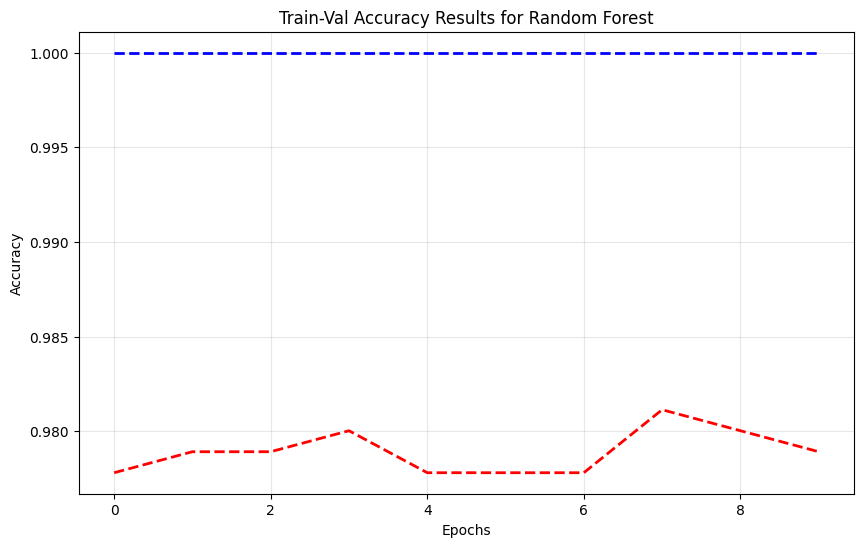

{'dataset': 'enron6_lemmatized_countvec', 'model': 'Random Forest', 'type': 'normal', 'metrics': {'accuracy': 0.9766666666666667, 'weighted_precision': 0.9767979797979798, 'wighted_recall': 0.9766666666666667, 'weighted_f1': 0.9764750681952331, 'macro_precision': 0.9787878787878788, 'macro_recall': 0.9633119719471444, 'macro_f1': 0.9706681606764015, 'roc_auc': 0.9633119719471442}, 'confusion_matrix': array([[236,  17],
       [  4, 643]], dtype=int64), 'epochs': 10}


KNeighborsClassifier classification report


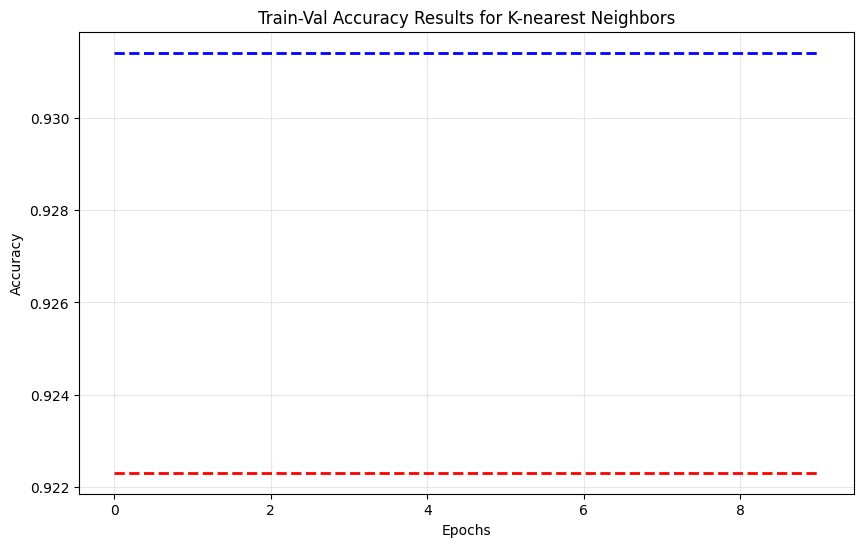

{'dataset': 'enron6_lemmatized_countvec', 'model': 'K-nearest Neighbors', 'type': 'normal', 'metrics': {'accuracy': 0.9, 'weighted_precision': 0.9056764735508566, 'wighted_recall': 0.9, 'weighted_f1': 0.8941398635477583, 'macro_precision': 0.9207881666524613, 'macro_recall': 0.8317622838152372, 'macro_f1': 0.8629385964912281, 'roc_auc': 0.8317622838152373}, 'confusion_matrix': array([[171,  82],
       [  8, 639]], dtype=int64), 'epochs': 10}


SGDClassifier classification report
LogisticRegression classification report


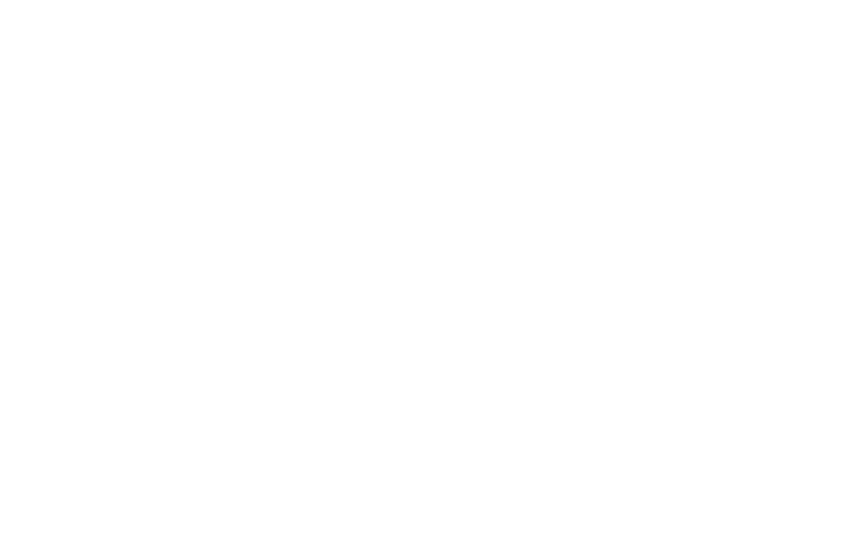

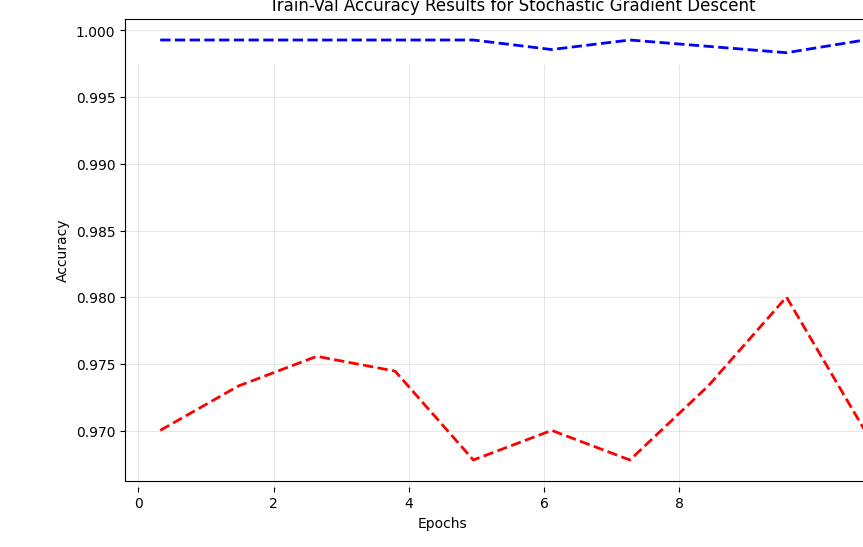

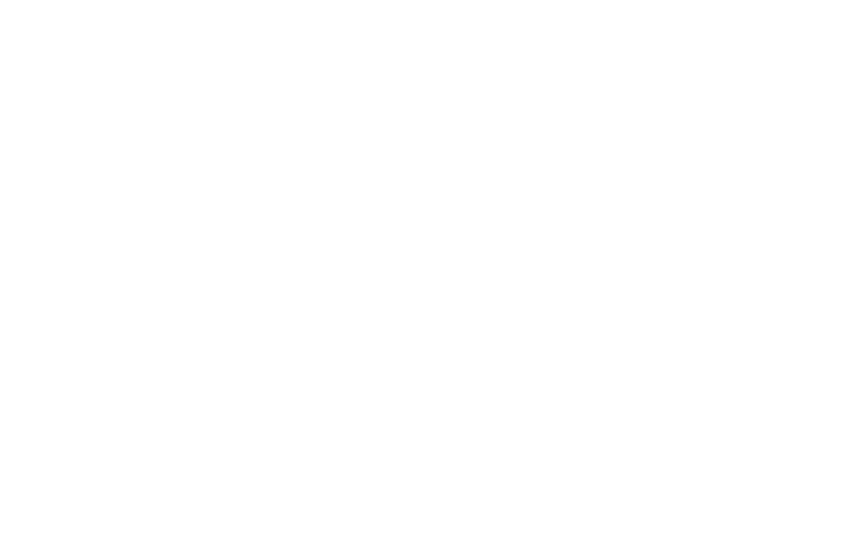

{'dataset': 'enron6_lemmatized_countvec', 'model': 'Stochastic Gradient Descent', 'type': 'normal', 'metrics': {'accuracy': 0.9677777777777777, 'weighted_precision': 0.9676947284394094, 'wighted_recall': 0.9677777777777777, 'weighted_f1': 0.9675555555555556, 'macro_precision': 0.9662073902886282, 'macro_recall': 0.953519130556964, 'macro_f1': 0.9595959595959596, 'roc_auc': 0.953519130556964}, 'confusion_matrix': array([[233,  20],
       [  9, 638]], dtype=int64), 'epochs': 10}




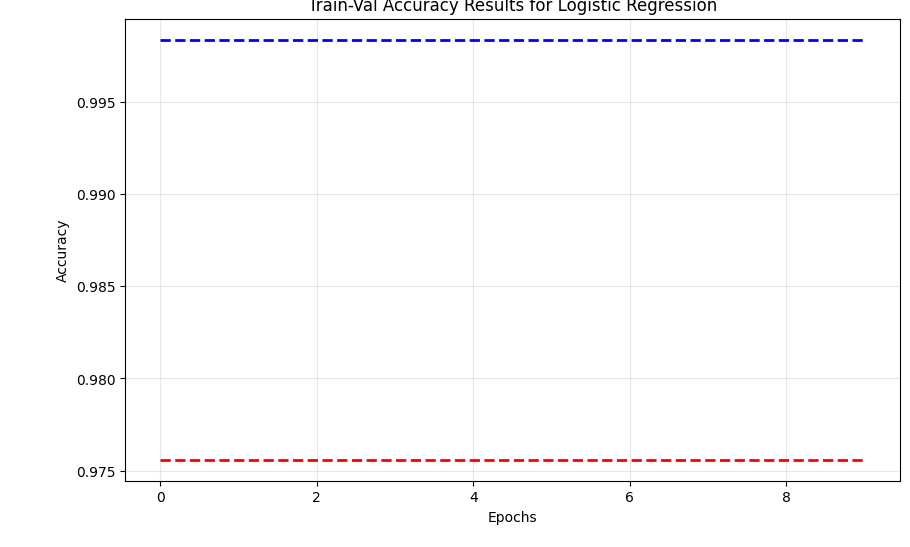

{'dataset': 'enron6_lemmatized_countvec', 'model': 'Logistic Regression', 'type': 'normal', 'metrics': {'accuracy': 0.9722222222222222, 'weighted_precision': 0.9726489309822643, 'wighted_recall': 0.9722222222222222, 'weighted_f1': 0.9718813375572275, 'macro_precision': 0.9770732270732271, 'macro_recall': 0.954203346549291, 'macro_f1': 0.964812466083127, 'roc_auc': 0.9542033465492911}, 'confusion_matrix': array([[231,  22],
       [  3, 644]], dtype=int64), 'epochs': 10}


Perceptron classification report


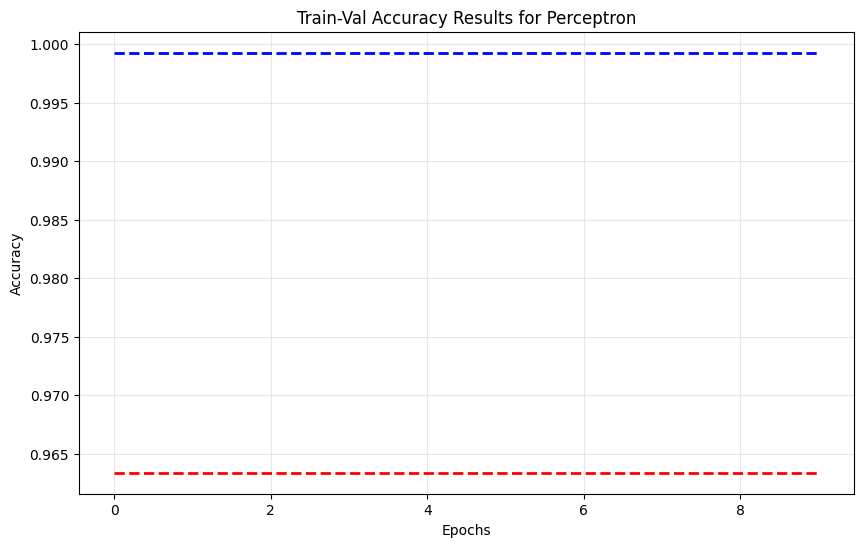

PassiveAggressiveClassifier classification report
{'dataset': 'enron6_lemmatized_countvec', 'model': 'Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9677777777777777, 'weighted_precision': 0.9676864957264957, 'wighted_recall': 0.9677777777777777, 'weighted_f1': 0.967718953136318, 'macro_precision': 0.9616923076923076, 'macro_recall': 0.9583330787886933, 'macro_f1': 0.9599933168912509, 'roc_auc': 0.9583330787886933}, 'confusion_matrix': array([[237,  16],
       [ 13, 634]], dtype=int64), 'epochs': 10}




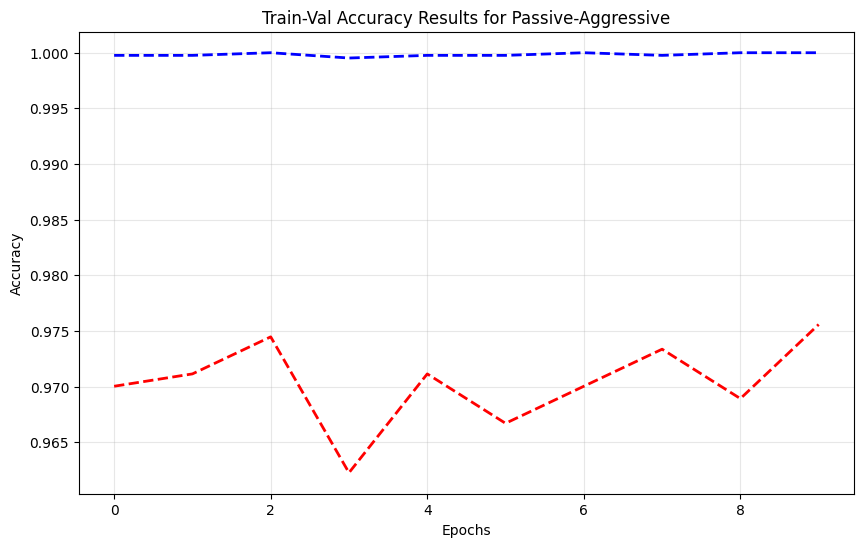

{'dataset': 'enron6_lemmatized_countvec', 'model': 'Passive-Aggressive', 'type': 'normal', 'metrics': {'accuracy': 0.9722222222222222, 'weighted_precision': 0.9721260197462452, 'wighted_recall': 0.9722222222222222, 'weighted_f1': 0.9721370704831035, 'macro_precision': 0.9683356421927568, 'macro_recall': 0.9626277559548173, 'macro_f1': 0.9654271134405553, 'roc_auc': 0.9626277559548174}, 'confusion_matrix': array([[238,  15],
       [ 10, 637]], dtype=int64), 'epochs': 10}


SVC classification report


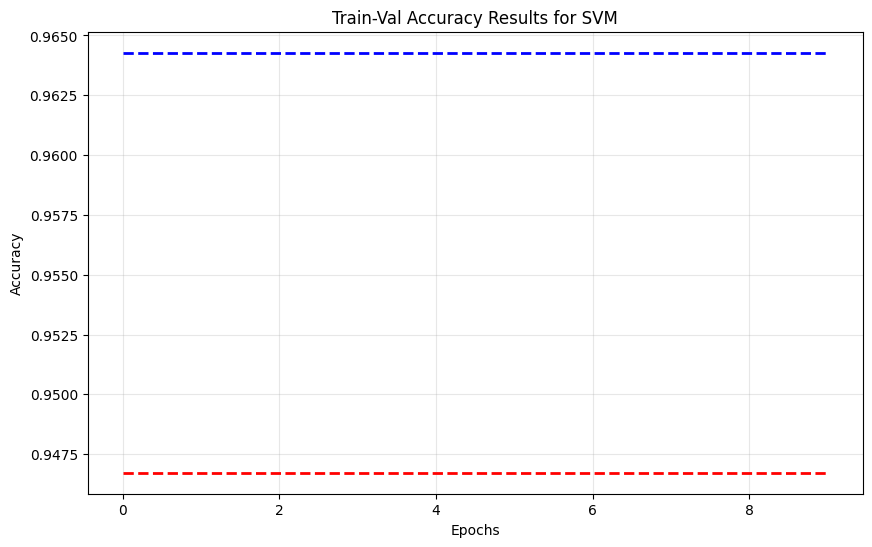

{'dataset': 'enron6_lemmatized_countvec', 'model': 'SVM', 'type': 'normal', 'metrics': {'accuracy': 0.9455555555555556, 'weighted_precision': 0.9493885696040868, 'wighted_recall': 0.9455555555555556, 'weighted_f1': 0.9436299773397065, 'macro_precision': 0.9647988505747127, 'macro_recall': 0.9031620553359684, 'macro_f1': 0.9281467565836959, 'roc_auc': 0.9031620553359684}, 'confusion_matrix': array([[204,  49],
       [  0, 647]], dtype=int64), 'epochs': 10}


MLPClassifier classification report


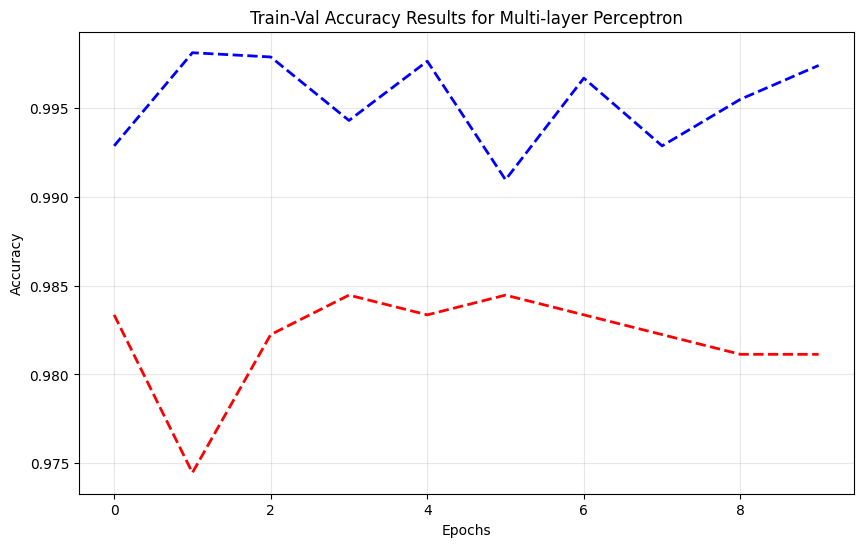

{'dataset': 'enron6_lemmatized_countvec', 'model': 'Multi-layer Perceptron', 'type': 'normal', 'metrics': {'accuracy': 0.9855555555555555, 'weighted_precision': 0.9855796308727613, 'wighted_recall': 0.9855555555555555, 'weighted_f1': 0.9854931008143196, 'macro_precision': 0.9862571790855523, 'macro_recall': 0.9779187615690539, 'macro_f1': 0.9819777910933318, 'roc_auc': 0.9779187615690539}, 'confusion_matrix': array([[243,  10],
       [  3, 644]], dtype=int64), 'epochs': 10}




In [11]:
train_and_evaluate_model(enron6_lemmatized_countvec_X, enron6_y, "enron6_lemmatized_countvec")
del enron6_lemmatized_countvec_X, enron6_y


merged_enron_lemmatized_countvec classification report
MultinomialNB classification report


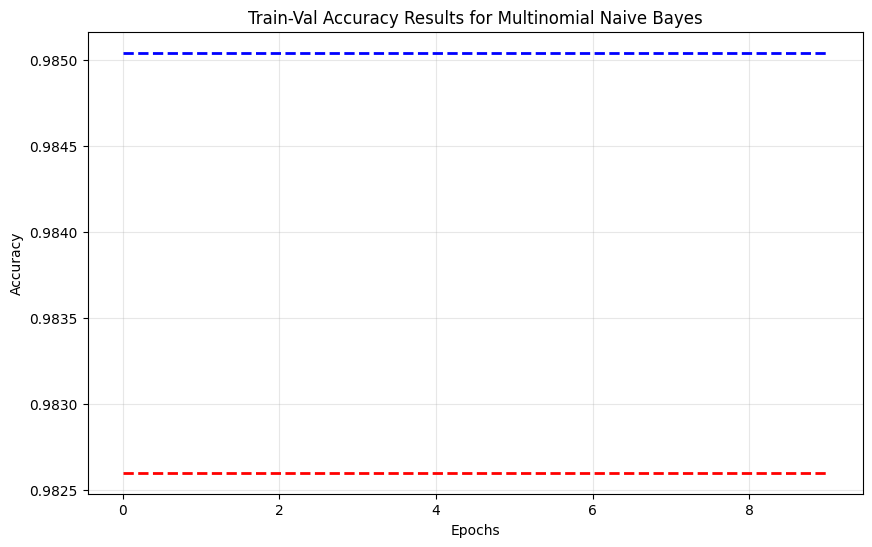

{'dataset': 'merged_enron_lemmatized_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9865559509687624, 'weighted_precision': 0.9866223776348988, 'wighted_recall': 0.9865559509687624, 'weighted_f1': 0.9865544369843586, 'macro_precision': 0.986695446967649, 'macro_recall': 0.9864762542785084, 'macro_f1': 0.9865511062186705, 'roc_auc': 0.9864762542785084}, 'confusion_matrix': array([[2447,   49],
       [  19, 2543]], dtype=int64), 'epochs': 10}


BernoulliNB classification report


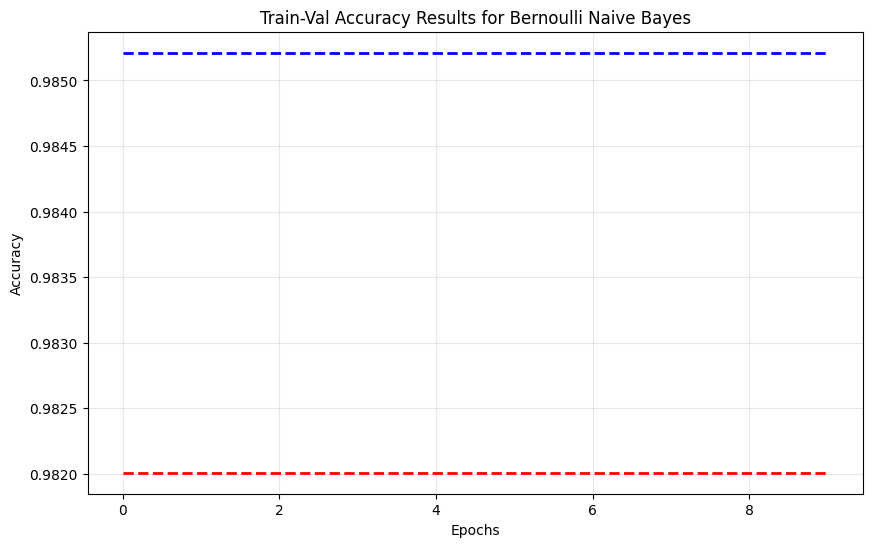

{'dataset': 'merged_enron_lemmatized_countvec', 'model': 'Bernoulli Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9857651245551602, 'weighted_precision': 0.985936764365009, 'wighted_recall': 0.9857651245551602, 'weighted_f1': 0.985762078324522, 'macro_precision': 0.9860547667342799, 'macro_recall': 0.9856388488560619, 'macro_f1': 0.9857578897573942, 'roc_auc': 0.9856388488560619}, 'confusion_matrix': array([[2436,   60],
       [  12, 2550]], dtype=int64), 'epochs': 10}




In [ ]:
train_and_evaluate_model(enron_lemmatized_countvec_X, enron_y, "merged_enron_lemmatized_countvec")
del enron_lemmatized_countvec_X, enron_y

## Lemmatizing + TF-IDF Vectorizer

In [ ]:
enron1_lemmatized_tfidf = joblib.load("./preprocess/enron1_lemmatized_tfidf.pkl")
enron2_lemmatized_tfidf = joblib.load("./preprocess/enron2_lemmatized_tfidf.pkl")
enron3_lemmatized_tfidf = joblib.load("./preprocess/enron3_lemmatized_tfidf.pkl")
enron4_lemmatized_tfidf = joblib.load("./preprocess/enron4_lemmatized_tfidf.pkl")
enron5_lemmatized_tfidf = joblib.load("./preprocess/enron5_lemmatized_tfidf.pkl")
enron6_lemmatized_tfidf = joblib.load("./preprocess/enron6_lemmatized_tfidf.pkl")
enron_lemmatized_tfidf = joblib.load("./preprocess/enron_lemmatized_tfidf.pkl")

In [ ]:
enron1_lemmatized_tfidf_X, enron1_y = enron1_lemmatized_tfidf["features"], enron1_lemmatized_tfidf["labels"]
enron2_lemmatized_tfidf_X, enron2_y = enron2_lemmatized_tfidf["features"], enron2_lemmatized_tfidf["labels"]
enron3_lemmatized_tfidf_X, enron3_y = enron3_lemmatized_tfidf["features"], enron3_lemmatized_tfidf["labels"]
enron4_lemmatized_tfidf_X, enron4_y = enron4_lemmatized_tfidf["features"], enron4_lemmatized_tfidf["labels"]
enron5_lemmatized_tfidf_X, enron5_y = enron5_lemmatized_tfidf["features"], enron5_lemmatized_tfidf["labels"]
enron6_lemmatized_tfidf_X, enron6_y = enron6_lemmatized_tfidf["features"], enron6_lemmatized_tfidf["labels"]
enron_lemmatized_tfidf_X, enron_y = enron_lemmatized_tfidf["features"], enron_lemmatized_tfidf["labels"]
del enron1_lemmatized_tfidf
del enron2_lemmatized_tfidf
del enron3_lemmatized_tfidf
del enron4_lemmatized_tfidf
del enron5_lemmatized_tfidf
del enron6_lemmatized_tfidf
del enron_lemmatized_tfidf

In [ ]:
train_and_evaluate_model(enron1_lemmatized_tfidf_X, enron1_y, "enron1_lemmatized_tfidf")
del enron1_lemmatized_tfidf_X, enron1_y

enron1_lemmatized_tfidf classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron1_lemmatized_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9729468599033816, 'weighted_precision': 0.9731985371953243, 'wighted_recall': 0.9729468599033816, 'weighted_f1': 0.9730328777310403, 'macro_precision': 0.9634879883478678, 'macro_recall': 0.969420766149738, 'macro_f1': 0.9663951686967169, 'roc_auc': 0.9694207661497382}, 'confusion_matrix': array([[732,  17],
       [ 11, 275]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron1_lemmatized_tfidf', 'model': 'Bernoulli Naive Bayes'

In [ ]:
train_and_evaluate_model(enron2_lemmatized_tfidf_X, enron2_y, "enron2_lemmatized_tfidf")
del enron2_lemmatized_tfidf_X, enron2_y

enron2_lemmatized_tfidf classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron2_lemmatized_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9829351535836177, 'weighted_precision': 0.9833225507780872, 'wighted_recall': 0.9829351535836177, 'weighted_f1': 0.9827496456049065, 'macro_precision': 0.9886492622020431, 'macro_recall': 0.9678456591639871, 'macro_f1': 0.977648176190349, 'roc_auc': 0.9678456591639871}, 'confusion_matrix': array([[861,   0],
       [ 20, 291]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron2_lemmatized_tfidf', 'model': 'Bernoulli Naive Bayes'

In [ ]:
train_and_evaluate_model(enron3_lemmatized_tfidf_X, enron3_y, "enron3_lemmatized_tfidf")
del enron3_lemmatized_tfidf_X, enron3_y

enron3_lemmatized_tfidf classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron3_lemmatized_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9664551223934723, 'weighted_precision': 0.9679451109546268, 'wighted_recall': 0.9664551223934723, 'weighted_f1': 0.9657605511761854, 'macro_precision': 0.9777911164465787, 'macro_recall': 0.9397394136807817, 'macro_f1': 0.9565809477909595, 'roc_auc': 0.9397394136807817}, 'confusion_matrix': array([[796,   0],
       [ 37, 270]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron3_lemmatized_tfidf', 'model': 'Bernoulli Naive Bayes

In [ ]:
train_and_evaluate_model(enron4_lemmatized_tfidf_X, enron4_y, "enron4_lemmatized_tfidf")
del enron4_lemmatized_tfidf_X, enron4_y

enron4_lemmatized_tfidf classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron4_lemmatized_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9308333333333333, 'weighted_precision': 0.9301898706591264, 'wighted_recall': 0.9308333333333333, 'weighted_f1': 0.9303749854048581, 'macro_precision': 0.9164296688568534, 'macro_recall': 0.9055341756391573, 'macro_f1': 0.9107717970792993, 'roc_auc': 0.9055341756391573}, 'confusion_matrix': array([[274,  48],
       [ 35, 843]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron4_lemmatized_tfidf', 'model': 'Bernoulli Naive Bayes

In [ ]:
train_and_evaluate_model(enron5_lemmatized_tfidf_X, enron5_y, "enron5_lemmatized_tfidf")
del enron5_lemmatized_tfidf_X, enron5_y

enron5_lemmatized_tfidf classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron5_lemmatized_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9903381642512077, 'weighted_precision': 0.9904081165495552, 'wighted_recall': 0.9903381642512077, 'weighted_f1': 0.990302244724901, 'macro_precision': 0.9921962721760611, 'macro_recall': 0.9849304824192648, 'macro_f1': 0.9884658589424697, 'roc_auc': 0.984930482419265}, 'confusion_matrix': array([[304,   9],
       [  1, 721]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron5_lemmatized_tfidf', 'model': 'Bernoulli Naive Bayes',

In [ ]:
train_and_evaluate_model(enron6_lemmatized_tfidf_X, enron6_y, "enron6_lemmatized_tfidf")
del enron6_lemmatized_tfidf_X, enron6_y

enron6_lemmatized_tfidf classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron6_lemmatized_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9683333333333334, 'weighted_precision': 0.96839253352664, 'wighted_recall': 0.9683333333333334, 'weighted_f1': 0.9680184659090908, 'macro_precision': 0.9691917361362812, 'macro_recall': 0.9508881922675025, 'macro_f1': 0.9595170454545454, 'roc_auc': 0.9508881922675025}, 'confusion_matrix': array([[301,  29],
       [  9, 861]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron6_lemmatized_tfidf', 'model': 'Bernoulli Naive Bayes',

In [ ]:
train_and_evaluate_model(enron_lemmatized_tfidf_X, enron_y, "merged_enron_lemmatized_tfidf")
del enron_lemmatized_tfidf_X, enron_y

merged_enron_lemmatized_tfidf classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'merged_enron_lemmatized_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9876909387512977, 'weighted_precision': 0.9876991462884057, 'wighted_recall': 0.9876909387512977, 'weighted_f1': 0.9876901503066002, 'macro_precision': 0.9877481179264838, 'macro_recall': 0.9876231644294102, 'macro_f1': 0.9876807415332103, 'roc_auc': 0.9876231644294102}, 'confusion_matrix': array([[3233,   49],
       [  34, 3427]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'merged_enron_lemmatized_tfidf', 'model': 

## Stemming + CountVectorizer

In [ ]:
enron1_stemmed_countvec = joblib.load("./preprocess/enron1_stemmed_countvec.pkl")
enron2_stemmed_countvec = joblib.load("./preprocess/enron2_stemmed_countvec.pkl")
enron3_stemmed_countvec = joblib.load("./preprocess/enron3_stemmed_countvec.pkl")
enron4_stemmed_countvec = joblib.load("./preprocess/enron4_stemmed_countvec.pkl")
enron5_stemmed_countvec = joblib.load("./preprocess/enron5_stemmed_countvec.pkl")
enron6_stemmed_countvec = joblib.load("./preprocess/enron6_stemmed_countvec.pkl")
enron_stemmed_countvec = joblib.load("./preprocess/enron_stemmed_countvec.pkl")

In [ ]:
enron1_stemmed_countvec_X, enron1_y = enron1_stemmed_countvec["features"], enron1_stemmed_countvec["labels"]
enron2_stemmed_countvec_X, enron2_y = enron2_stemmed_countvec["features"], enron2_stemmed_countvec["labels"]
enron3_stemmed_countvec_X, enron3_y = enron3_stemmed_countvec["features"], enron3_stemmed_countvec["labels"]
enron4_stemmed_countvec_X, enron4_y = enron4_stemmed_countvec["features"], enron4_stemmed_countvec["labels"]
enron5_stemmed_countvec_X, enron5_y = enron5_stemmed_countvec["features"], enron5_stemmed_countvec["labels"]
enron6_stemmed_countvec_X, enron6_y = enron6_stemmed_countvec["features"], enron6_stemmed_countvec["labels"]
enron_stemmed_countvec_X, enron_y = enron_stemmed_countvec["features"], enron_stemmed_countvec["labels"]
del enron1_stemmed_countvec
del enron2_stemmed_countvec
del enron3_stemmed_countvec
del enron4_stemmed_countvec
del enron5_stemmed_countvec
del enron6_stemmed_countvec
del enron_stemmed_countvec

In [ ]:
train_and_evaluate_model(enron1_stemmed_countvec_X, enron1_y, "enron1_stemmed_countvec")
del enron1_stemmed_countvec_X

enron1_stemmed_countvec classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron1_stemmed_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9652173913043478, 'weighted_precision': 0.9681234179128813, 'wighted_recall': 0.9652173913043478, 'weighted_f1': 0.9657286594737519, 'macro_precision': 0.9456985792503654, 'macro_recall': 0.9727258722585825, 'macro_f1': 0.9578380873926149, 'roc_auc': 0.9727258722585825}, 'confusion_matrix': array([[716,  33],
       [  3, 283]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron1_stemmed_countvec', 'model': 'Bernoulli Naive Bayes

In [ ]:
train_and_evaluate_model(enron2_stemmed_countvec_X, enron2_y, "enron2_stemmed_countvec")
del enron2_stemmed_countvec_X, enron2_y

enron2_stemmed_countvec classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron2_stemmed_countvec', 'model': 'Bernoulli Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9709897610921502, 'weighted_precision': 0.9733302449665505, 'wighted_recall': 0.9709897610921502, 'weighted_f1': 0.9713999915949154, 'macro_precision': 0.9518758094512141, 'macro_recall': 0.9782015229431118, 'macro_f1': 0.9638790990442211, 'roc_auc': 0.9782015229431118}, 'confusion_matrix': array([[829,  32],
       [  2, 309]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron2_stemmed_countvec', 'model': 'Multinomial Naive Bayes

In [ ]:
train_and_evaluate_model(enron3_stemmed_countvec_X, enron3_y, "enron3_stemmed_countvec")
del enron3_stemmed_countvec_X, enron3_y

enron3_stemmed_countvec classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron3_stemmed_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9882139619220308, 'weighted_precision': 0.9882048545872328, 'wighted_recall': 0.9882139619220308, 'weighted_f1': 0.9881840294500699, 'macro_precision': 0.9877595059156188, 'macro_recall': 0.9828294567299036, 'macro_f1': 0.9852566336922781, 'roc_auc': 0.9828294567299035}, 'confusion_matrix': array([[792,   4],
       [  9, 298]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron3_stemmed_countvec', 'model': 'Bernoulli Naive Bayes

In [ ]:
train_and_evaluate_model(enron4_stemmed_countvec_X, enron4_y, "enron4_stemmed_countvec")
del enron4_stemmed_countvec_X, enron4_y

enron4_stemmed_countvec classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
{'dataset': 'enron4_stemmed_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9808333333333333, 'weighted_precision': 0.9807918533252206, 'wighted_recall': 0.9808333333333333, 'weighted_f1': 0.9808048260531901, 'macro_precision': 0.9769480392401054, 'macro_recall': 0.9741189037762277, 'macro_f1': 0.9755214767999476, 'roc_auc': 0.9741189037762278}, 'confusion_matrix': array([[309,  13],
       [ 10, 868]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
BernoulliNB classification report
{'dataset': 'enron4_stemmed_countvec', 'model': 'Bernoulli Naive Bayes

In [ ]:
train_and_evaluate_model(enron5_stemmed_countvec_X, enron5_y, "enron5_stemmed_countvec")
del enron5_stemmed_countvec_X, enron5_y

enron5_stemmed_countvec classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron5_stemmed_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.996135265700483, 'weighted_precision': 0.996135265700483, 'wighted_recall': 0.996135265700483, 'weighted_f1': 0.996135265700483, 'macro_precision': 0.9954200702698397, 'macro_recall': 0.9954200702698397, 'macro_f1': 0.9954200702698397, 'roc_auc': 0.9954200702698398}, 'confusion_matrix': array([[311,   2],
       [  2, 720]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron5_stemmed_countvec', 'model': 'Bernoulli Naive Bayes', '

In [ ]:
train_and_evaluate_model(enron6_stemmed_countvec_X, enron6_y, "enron6_stemmed_countvec")
del enron6_stemmed_countvec_X, enron6_y

enron6_stemmed_countvec classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron6_stemmed_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9833333333333333, 'weighted_precision': 0.9836525307797537, 'wighted_recall': 0.9833333333333333, 'weighted_f1': 0.983409541885946, 'macro_precision': 0.9750341997264023, 'macro_recall': 0.98380355276907, 'macro_f1': 0.9792942800448623, 'roc_auc': 0.98380355276907}, 'confusion_matrix': array([[325,   5],
       [ 15, 855]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron6_stemmed_countvec', 'model': 'Bernoulli Naive Bayes', 't

In [ ]:
train_and_evaluate_model(enron_stemmed_countvec_X, enron_y, "merged_enron_stemmed_countvec")
del enron_stemmed_countvec_X, enron_y

merged_enron_stemmed_countvec classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
{'dataset': 'merged_enron_stemmed_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.983538484354145, 'weighted_precision': 0.9835580280278035, 'wighted_recall': 0.983538484354145, 'weighted_f1': 0.9835368007785356, 'macro_precision': 0.9836340784100833, 'macro_recall': 0.9834362649113012, 'macro_f1': 0.9835236981683569, 'roc_auc': 0.9834362649113012}, 'confusion_matrix': array([[3215,   67],
       [  44, 3417]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
BernoulliNB classification report
{'dataset': 'merged_enron_stemmed_countvec', 'model': 'B

e:\Python Tests\AI\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression classification report
{'dataset': 'merged_enron_stemmed_countvec', 'model': 'Logistic Regression', 'type': 'normal', 'metrics': {'accuracy': 0.9866528251520095, 'weighted_precision': 0.9867312094856, 'wighted_recall': 0.9866528251520095, 'weighted_f1': 0.9866499416794458, 'macro_precision': 0.9868906503459718, 'macro_recall': 0.986470070169897, 'macro_f1': 0.986638211188789, 'roc_auc': 0.9864700701698971}, 'confusion_matrix': array([[3215,   67],
       [  23, 3438]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
KNeighborsClassifier classification report
{'dataset': 'merged_enron_stemmed_countvec', 'model': 'K-nearest Neighbors', 'type': 'normal', 'metrics': {'accuracy': 0.8878837312768797, 'weighted_precision': 0.8938395290484861, 'wighted_recall': 0.8878837312768797, 'weighted_f1': 0.8872430565715047, 'macro_precision': 0.8950908058103612, 'macro_recall': 0.8861263956111638, 'macro_f1': 0.8869738528807487, '

## Stemming + TF-IDF Vectorizer

In [ ]:
enron1_stemmed_tfidf = joblib.load("./preprocess/enron1_stemmed_tfidf.pkl")
enron2_stemmed_tfidf = joblib.load("./preprocess/enron2_stemmed_tfidf.pkl")
enron3_stemmed_tfidf = joblib.load("./preprocess/enron3_stemmed_tfidf.pkl")
enron4_stemmed_tfidf = joblib.load("./preprocess/enron4_stemmed_tfidf.pkl")
enron5_stemmed_tfidf = joblib.load("./preprocess/enron5_stemmed_tfidf.pkl")
enron6_stemmed_tfidf = joblib.load("./preprocess/enron6_stemmed_tfidf.pkl")
enron_stemmed_tfidf = joblib.load("./preprocess/enron_stemmed_tfidf.pkl")

In [ ]:
enron1_stemmed_tfidf_X, enron1_y = enron1_stemmed_tfidf["features"], enron1_stemmed_tfidf["labels"]
enron2_stemmed_tfidf_X, enron2_y = enron2_stemmed_tfidf["features"], enron2_stemmed_tfidf["labels"]
enron3_stemmed_tfidf_X, enron3_y = enron3_stemmed_tfidf["features"], enron3_stemmed_tfidf["labels"]
enron4_stemmed_tfidf_X, enron4_y = enron4_stemmed_tfidf["features"], enron4_stemmed_tfidf["labels"]
enron5_stemmed_tfidf_X, enron5_y = enron5_stemmed_tfidf["features"], enron5_stemmed_tfidf["labels"]
enron6_stemmed_tfidf_X, enron6_y = enron6_stemmed_tfidf["features"], enron6_stemmed_tfidf["labels"]
enron_stemmed_tfidf_X, enron_y = enron_stemmed_tfidf["features"], enron_stemmed_tfidf["labels"]
del enron1_stemmed_tfidf
del enron2_stemmed_tfidf
del enron3_stemmed_tfidf
del enron4_stemmed_tfidf
del enron5_stemmed_tfidf
del enron6_stemmed_tfidf
del enron_stemmed_tfidf

In [ ]:
train_and_evaluate_model(enron1_stemmed_tfidf_X, enron1_y, "enron1_stemmed_tfidf")
del enron1_stemmed_tfidf_X, enron1_y

enron1_stemmed_tfidf classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron1_stemmed_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9632850241545894, 'weighted_precision': 0.9633726532539174, 'wighted_recall': 0.9632850241545894, 'weighted_f1': 0.963324445430989, 'macro_precision': 0.9532295850066934, 'macro_recall': 0.9551803336850067, 'macro_f1': 0.9541984199444744, 'roc_auc': 0.9551803336850065}, 'confusion_matrix': array([[729,  20],
       [ 18, 268]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron1_stemmed_tfidf', 'model': 'Bernoulli Naive Bayes', 'type':

In [ ]:
train_and_evaluate_model(enron2_stemmed_tfidf_X, enron2_y, "enron2_stemmed_tfidf")
del enron2_stemmed_tfidf_X, enron2_y

enron2_stemmed_tfidf classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron2_stemmed_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9803754266211604, 'weighted_precision': 0.9808860207249085, 'wighted_recall': 0.9803754266211604, 'weighted_f1': 0.9801279920214123, 'macro_precision': 0.9869909502262444, 'macro_recall': 0.9630225080385852, 'macro_f1': 0.9742110776796092, 'roc_auc': 0.9630225080385852}, 'confusion_matrix': array([[861,   0],
       [ 23, 288]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron2_stemmed_tfidf', 'model': 'Bernoulli Naive Bayes', 'type'

In [ ]:
train_and_evaluate_model(enron3_stemmed_tfidf_X, enron3_y, "enron3_stemmed_tfidf")
del enron3_stemmed_tfidf_X, enron3_y

enron3_stemmed_tfidf classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron3_stemmed_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9601087941976428, 'weighted_precision': 0.9621983335491949, 'wighted_recall': 0.9601087941976428, 'weighted_f1': 0.9591055679306705, 'macro_precision': 0.9738095238095238, 'macro_recall': 0.9283387622149837, 'macro_f1': 0.9479560760090937, 'roc_auc': 0.9283387622149837}, 'confusion_matrix': array([[796,   0],
       [ 44, 263]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron3_stemmed_tfidf', 'model': 'Bernoulli Naive Bayes', 'type'

In [ ]:
train_and_evaluate_model(enron4_stemmed_tfidf_X, enron4_y, "enron4_stemmed_tfidf")
del enron4_stemmed_tfidf_X, enron4_y

enron4_stemmed_tfidf classification report
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
BernoulliNB classification report
{'dataset': 'enron4_stemmed_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9233333333333333, 'weighted_precision': 0.9224284343671678, 'wighted_recall': 0.9233333333333333, 'weighted_f1': 0.9226200484335921, 'macro_precision': 0.9084527725563909, 'macro_recall': 0.8935256582577569, 'macro_f1': 0.9005874704193695, 'roc_auc': 0.8935256582577569}, 'confusion_matrix': array([[267,  55],
       [ 37, 841]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
{'dataset': 'enron4_stemmed_tfidf', 'model': 'Bernoulli Naive Bayes', 'type'

In [ ]:
train_and_evaluate_model(enron5_stemmed_tfidf_X, enron5_y, "enron5_stemmed_tfidf")
del enron5_stemmed_tfidf_X, enron5_y

enron5_stemmed_tfidf classification report
The model has already been trained. This process will overwrite the previous training.
SVC classification report
{'dataset': 'enron5_stemmed_tfidf', 'model': 'SVM', 'type': 'grid_search', 'metrics': {'accuracy': 0.9864734299516909, 'weighted_precision': 0.9865680462082798, 'wighted_recall': 0.9864734299516909, 'weighted_f1': 0.9864101513913127, 'macro_precision': 0.9885029486555212, 'macro_recall': 0.979445629375271, 'macro_f1': 0.983822058271852, 'roc_auc': 0.9794456293752709}, 'confusion_matrix': array([[301,  12],
       [  2, 720]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
{'dataset': 'enron5_stemmed_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'grid_search', 'metrics': {'accuracy': 0.9903381642512077, 'weighted_precision': 0.9904081165495552, 'wighted_recall': 0.9903381642512077, 'weighted_f1': 0.990302244724901, 'macro_precision': 0.9

In [ ]:
train_and_evaluate_model(enron6_stemmed_tfidf_X, enron6_y, "enron6_stemmed_tfidf")
del enron6_stemmed_tfidf_X, enron6_y

enron6_stemmed_tfidf classification report
The model has already been trained. This process will overwrite the previous training.
SVC classification report
{'dataset': 'enron6_stemmed_tfidf', 'model': 'SVM', 'type': 'grid_search', 'metrics': {'accuracy': 0.9791666666666666, 'weighted_precision': 0.9796193521088742, 'wighted_recall': 0.9791666666666666, 'weighted_f1': 0.978926449937713, 'macro_precision': 0.984933485560877, 'macro_recall': 0.9630616509926855, 'macro_f1': 0.9732865789101102, 'roc_auc': 0.9630616509926855}, 'confusion_matrix': array([[306,  24],
       [  1, 869]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
{'dataset': 'enron6_stemmed_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'grid_search', 'metrics': {'accuracy': 0.9575, 'weighted_precision': 0.9574965656195623, 'wighted_recall': 0.9575, 'weighted_f1': 0.9569643773281881, 'macro_precision': 0.9574594743108343, 'macro

In [ ]:
train_and_evaluate_model(enron_stemmed_tfidf_X, enron_y, "merged_enron_stemmed_tfidf")
del enron_stemmed_tfidf_X, enron_y

merged_enron_stemmed_tfidf classification report
The model has already been trained. This process will overwrite the previous training.
SVC classification report
{'dataset': 'merged_enron_stemmed_tfidf', 'model': 'SVM', 'type': 'grid_search', 'metrics': {'accuracy': 0.9882841465223194, 'weighted_precision': 0.9883829310793999, 'wighted_recall': 0.9882841465223194, 'weighted_f1': 0.9882812645131659, 'macro_precision': 0.9885633640969242, 'macro_recall': 0.9880828438977298, 'macro_f1': 0.988270736357278, 'roc_auc': 0.9880828438977297}, 'confusion_matrix': array([[3218,   64],
       [  15, 3446]], dtype=int64)}


The model has already been trained. This process will overwrite the previous training.
MultinomialNB classification report
{'dataset': 'merged_enron_stemmed_tfidf', 'model': 'Multinomial Naive Bayes', 'type': 'grid_search', 'metrics': {'accuracy': 0.9844282960106777, 'weighted_precision': 0.9844295270093795, 'wighted_recall': 0.9844282960106777, 'weighted_f1': 0.9844278497677168

In [ ]:
print(metric_results)

def convert(dic):
    dic["confusion_matrix"] = dic["confusion_matrix"].tolist()
    return dic

metric_results = list(map(convert, metric_results))

add_to_json_array("./enron_classification_report.json", metric_results, mode=JSON_WRITE_MODE)

[{'dataset': 'enron1_lemmatized_countvec', 'model': 'SVM', 'type': 'normal', 'metrics': {'accuracy': 0.9420289855072463, 'weighted_precision': 0.9470135354784451, 'wighted_recall': 0.9420289855072463, 'weighted_f1': 0.9430802227451286, 'macro_precision': 0.916647132364432, 'macro_recall': 0.948058950395399, 'macro_f1': 0.9302717269256682, 'roc_auc': 0.948058950395399}, 'confusion_matrix': array([[700,  49],
       [ 11, 275]], dtype=int64)}, {'dataset': 'enron1_lemmatized_countvec', 'model': 'Multinomial Naive Bayes', 'type': 'normal', 'metrics': {'accuracy': 0.9671497584541063, 'weighted_precision': 0.969708044788234, 'wighted_recall': 0.9671497584541063, 'weighted_f1': 0.967603404646883, 'macro_precision': 0.9485564988471427, 'macro_recall': 0.9740609857432287, 'macro_f1': 0.9601020408163266, 'roc_auc': 0.9740609857432287}, 'confusion_matrix': array([[718,  31],
       [  3, 283]], dtype=int64)}, {'dataset': 'enron1_lemmatized_countvec', 'model': 'Bernoulli Naive Bayes', 'type': 'nor